In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import plotly.express as px

In [3]:
RANDOM_STATE = 2020

In [4]:
df = pd.read_pickle('./df_merge_final_0701.pkl')
df.head()

,device_id,event_id,app_id,label_id,brand_parse,model_parse,longitude,latitude,hour_plus_four,is_active,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device,gender,age_cate,age
0,3592244226009767782,2559251,6806547847175677243,756,LG,G3,0.00,0.00,20,1.0,57,47,46,M,A32-40,36
1,2526025498254449332,1978897,-747926486627391271,713,Samsung,Galaxy Grand,114.37,30.60,25,1.0,1310,77,94,M,A32-40,34
2,2526025498254449332,1384037,8693964245073640147,172,Samsung,Galaxy Grand,114.37,30.61,13,1.0,1310,77,94,M,A32-40,34
3,2634148490662474075,2595002,628020936226491308,548,Simi,R5s plus,0.00,0.00,23,0.0,28,39,65,M,A27-28,28
4,4210063776137603404,240752,5001052381732531443,794,OPPO,R7 Plus,0.00,0.00,4,0.0,61,28,46,F,A32-40,39


In [5]:
# df.to_pickle('./df_merge_final_0701.pkl')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000000 entries, 0 to 4999999
Data columns (total 16 columns):
 #   Column               Dtype   
---  ------               -----   
 0   device_id            category
 1   event_id             category
 2   app_id               category
 3   label_id             category
 4   brand_parse          category
 5   model_parse          category
 6   longitude            float64 
 7   latitude             float64 
 8   hour_plus_four       int8    
 9   is_active            category
 10  event_cnt_by_device  int64   
 11  app_cnt_by_device    int64   
 12  label_cnt_by_device  int64   
 13  gender               category
 14  age_cate             category
 15  age                  int8    
dtypes: category(9), float64(2), int64(3), int8(2)
memory usage: 339.2 MB


In [7]:
# df_target = pd.read_pickle('./df_target.pkl')
# df_device_phone = pd.read_pickle('./df_device_phone.pkl')
# df_events = pd.read_pickle('./df_events.pkl')
# df_app_events = pd.read_pickle('./df_app_events.pkl')
# df_app_labels = pd.read_pickle('./df_app_labels.pkl')

In [8]:
# df_count_by_device = pd.read_pickle('./df_count_by_device.pkl')
# df_count_by_app = pd.read_pickle('./df_count_by_app.pkl')
# df_count_by_label = pd.read_pickle('./df_count_by_label.pkl')
# df_count_by_event = pd.read_pickle('./df_count_by_event.pkl')

# hold out set
(based on device_id, we don't train split on all the dataset, but on device_id instead

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
deivce_id_list = df.device_id.unique()
# deivce_id_list

list_train, list_holdout = train_test_split(deivce_id_list, test_size=0.1, random_state=RANDOM_STATE)
# list_train

df_train = df[df.device_id.isin(list_train)]
df_holdout = df[df.device_id.isin(list_holdout)]

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4490982 entries, 0 to 4999999
Data columns (total 16 columns):
 #   Column               Dtype   
---  ------               -----   
 0   device_id            category
 1   event_id             category
 2   app_id               category
 3   label_id             category
 4   brand_parse          category
 5   model_parse          category
 6   longitude            float64 
 7   latitude             float64 
 8   hour_plus_four       int8    
 9   is_active            category
 10  event_cnt_by_device  int64   
 11  app_cnt_by_device    int64   
 12  label_cnt_by_device  int64   
 13  gender               category
 14  age_cate             category
 15  age                  int8    
dtypes: category(9), float64(2), int64(3), int8(2)
memory usage: 307.2 MB


In [12]:
df_holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509018 entries, 1 to 4999993
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   device_id            509018 non-null  category
 1   event_id             509018 non-null  category
 2   app_id               509018 non-null  category
 3   label_id             509018 non-null  category
 4   brand_parse          509018 non-null  category
 5   model_parse          509018 non-null  category
 6   longitude            509018 non-null  float64 
 7   latitude             509018 non-null  float64 
 8   hour_plus_four       509018 non-null  int8    
 9   is_active            509018 non-null  category
 10  event_cnt_by_device  509018 non-null  int64   
 11  app_cnt_by_device    509018 non-null  int64   
 12  label_cnt_by_device  509018 non-null  int64   
 13  gender               509018 non-null  category
 14  age_cate             509018 non-null  category
 15 

In [13]:
# df_train_sample = df_train.sample(n=500000, random_state = RANDOM_STATE)
df_train_sample = df_train

# Pipeline
the foucs here is 

In [14]:
# from lightgbm import LGBMClassifier
import skopt
import lightgbm as lgb
import skopt.plots


In [15]:
from sklearn.preprocessing import LabelEncoder



In [16]:
# label encoder, it is best to define the order
le = LabelEncoder()
# le.fit(['M', 'F'])
label_encode = le.fit_transform(df_train_sample['gender'])
label_encode
le.classes_

array(['F', 'M'], dtype=object)

In [17]:
print(df_train_sample['gender'].head())
label_encode[:5]

0    M
3    M
4    F
5    M
6    M
Name: gender, dtype: category
Categories (2, object): [M, F]


array([1, 1, 0, 1, 1])

In [18]:
def train_evaluate(search_params):
    
    
    X = df_train_sample.drop(['device_id', 'event_id', 'gender','age_cate', 'age'], axis=1)
    label_encode = le.fit_transform(df_train_sample['gender'])
#     label_encode
    y = label_encode
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234)

    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

    params = {
        'objective': 'binary',
        #               'metric': 'auc',
        'metric': 'binary_logloss',
         
              **search_params}

    model = lgb.train(params, train_data,
                      num_boost_round=100,
                      early_stopping_rounds=30,
                      valid_sets=[valid_data],
                      valid_names=['valid'])

    score = model.best_score['valid']['binary_logloss']
    return  score

In [19]:
# note 'metric': 'multi_logloss',
def train_evaluate_multi(search_params):
    
    
    X = df_train_sample.drop(['device_id', 'event_id', 'gender','age_cate', 'age'], axis=1)
    label_encode = le.fit_transform(df_train_sample['gender'])
#     label_encode
    y = label_encode
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234)

    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

    params = {
            'objective': 'multiclass', 'num_class': 2,
              'metric': 'multi_logloss',
         
              **search_params}

    model = lgb.train(params, train_data,
                      num_boost_round=100,
                      early_stopping_rounds=30,
                      valid_sets=[valid_data],
                      valid_names=['valid'])

    score = model.best_score['valid']['multi_logloss']
    return score

In [20]:
SPACE = [
    skopt.space.Real(0.001, 0.1, name='learning_rate', prior='log-uniform'),
    skopt.space.Integer(1, 10, name='max_depth'),
    skopt.space.Integer(2, 100, name='num_leaves'),
    skopt.space.Real(0.1, 1.0, name='feature_fraction', prior='uniform'),
    skopt.space.Real(0.1, 1.0, name='subsample', prior='uniform'),
#     skopt.space.Categorical(categories=['binary', 'multiclass'], name='objective', )
]


@skopt.utils.use_named_args(SPACE)
def objective(**params):
    return 1.0 * train_evaluate(params)
#     return 1.0 * train_evaluate(params).best_score['valid']['binary_logloss']
#     return 1.0 * train_evaluate_multi(params)


results = skopt.forest_minimize(objective, SPACE, n_calls=30, n_random_starts=10)

# model = skopt.forest_minimize(objective, SPACE, n_calls=30, n_random_starts=10)

# results = model.best_score['valid']['binary_logloss']

# best_auc = -1.0 * results.fun
best_auc = 1.0 * results.fun
best_params = results.x

print('best result: ', best_auc)
print('best parameters: ', best_params)

[1]	valid's binary_logloss: 0.540156
Training until validation scores don't improve for 30 rounds
[2]	valid's binary_logloss: 0.528822
[3]	valid's binary_logloss: 0.51928
[4]	valid's binary_logloss: 0.511339
[5]	valid's binary_logloss: 0.503283
[6]	valid's binary_logloss: 0.494378
[7]	valid's binary_logloss: 0.486104
[8]	valid's binary_logloss: 0.481774
[9]	valid's binary_logloss: 0.470513
[10]	valid's binary_logloss: 0.461908
[11]	valid's binary_logloss: 0.454729
[12]	valid's binary_logloss: 0.449094
[13]	valid's binary_logloss: 0.442778
[14]	valid's binary_logloss: 0.436004
[15]	valid's binary_logloss: 0.432921
[16]	valid's binary_logloss: 0.424429
[17]	valid's binary_logloss: 0.419268
[18]	valid's binary_logloss: 0.416384
[19]	valid's binary_logloss: 0.414684
[20]	valid's binary_logloss: 0.41239
[21]	valid's binary_logloss: 0.408274
[22]	valid's binary_logloss: 0.402177
[23]	valid's binary_logloss: 0.396401
[24]	valid's binary_logloss: 0.390938
[25]	valid's binary_logloss: 0.386855


[9]	valid's binary_logloss: 0.555496
[10]	valid's binary_logloss: 0.554946
[11]	valid's binary_logloss: 0.554439
[12]	valid's binary_logloss: 0.554097
[13]	valid's binary_logloss: 0.553559
[14]	valid's binary_logloss: 0.552984
[15]	valid's binary_logloss: 0.552645
[16]	valid's binary_logloss: 0.552088
[17]	valid's binary_logloss: 0.55173
[18]	valid's binary_logloss: 0.551192
[19]	valid's binary_logloss: 0.551005
[20]	valid's binary_logloss: 0.550529
[21]	valid's binary_logloss: 0.55001
[22]	valid's binary_logloss: 0.549496
[23]	valid's binary_logloss: 0.548973
[24]	valid's binary_logloss: 0.54847
[25]	valid's binary_logloss: 0.547955
[26]	valid's binary_logloss: 0.547618
[27]	valid's binary_logloss: 0.54716
[28]	valid's binary_logloss: 0.546715
[29]	valid's binary_logloss: 0.546219
[30]	valid's binary_logloss: 0.545761
[31]	valid's binary_logloss: 0.545315
[32]	valid's binary_logloss: 0.545048
[33]	valid's binary_logloss: 0.544845
[34]	valid's binary_logloss: 0.544369
[35]	valid's bina

[18]	valid's binary_logloss: 0.555689
[19]	valid's binary_logloss: 0.555581
[20]	valid's binary_logloss: 0.55541
[21]	valid's binary_logloss: 0.55531
[22]	valid's binary_logloss: 0.55495
[23]	valid's binary_logloss: 0.554726
[24]	valid's binary_logloss: 0.554506
[25]	valid's binary_logloss: 0.554142
[26]	valid's binary_logloss: 0.553923
[27]	valid's binary_logloss: 0.5537
[28]	valid's binary_logloss: 0.55341
[29]	valid's binary_logloss: 0.553256
[30]	valid's binary_logloss: 0.553093
[31]	valid's binary_logloss: 0.552897
[32]	valid's binary_logloss: 0.552611
[33]	valid's binary_logloss: 0.552271
[34]	valid's binary_logloss: 0.551977
[35]	valid's binary_logloss: 0.55189
[36]	valid's binary_logloss: 0.551606
[37]	valid's binary_logloss: 0.551347
[38]	valid's binary_logloss: 0.551213
[39]	valid's binary_logloss: 0.551023
[40]	valid's binary_logloss: 0.550935
[41]	valid's binary_logloss: 0.550881
[42]	valid's binary_logloss: 0.550665
[43]	valid's binary_logloss: 0.550447
[44]	valid's binary

[28]	valid's binary_logloss: 0.555686
[29]	valid's binary_logloss: 0.555527
[30]	valid's binary_logloss: 0.555421
[31]	valid's binary_logloss: 0.555296
[32]	valid's binary_logloss: 0.555197
[33]	valid's binary_logloss: 0.555117
[34]	valid's binary_logloss: 0.554979
[35]	valid's binary_logloss: 0.554842
[36]	valid's binary_logloss: 0.554697
[37]	valid's binary_logloss: 0.554561
[38]	valid's binary_logloss: 0.554414
[39]	valid's binary_logloss: 0.554315
[40]	valid's binary_logloss: 0.554169
[41]	valid's binary_logloss: 0.554091
[42]	valid's binary_logloss: 0.554006
[43]	valid's binary_logloss: 0.55387
[44]	valid's binary_logloss: 0.553732
[45]	valid's binary_logloss: 0.553583
[46]	valid's binary_logloss: 0.553439
[47]	valid's binary_logloss: 0.553335
[48]	valid's binary_logloss: 0.553239
[49]	valid's binary_logloss: 0.553092
[50]	valid's binary_logloss: 0.553002
[51]	valid's binary_logloss: 0.552867
[52]	valid's binary_logloss: 0.552731
[53]	valid's binary_logloss: 0.552616
[54]	valid's 

[37]	valid's binary_logloss: 0.445228
[38]	valid's binary_logloss: 0.443114
[39]	valid's binary_logloss: 0.44184
[40]	valid's binary_logloss: 0.440933
[41]	valid's binary_logloss: 0.438487
[42]	valid's binary_logloss: 0.436929
[43]	valid's binary_logloss: 0.43578
[44]	valid's binary_logloss: 0.435354
[45]	valid's binary_logloss: 0.433411
[46]	valid's binary_logloss: 0.431833
[47]	valid's binary_logloss: 0.431158
[48]	valid's binary_logloss: 0.428032
[49]	valid's binary_logloss: 0.427676
[50]	valid's binary_logloss: 0.425969
[51]	valid's binary_logloss: 0.425385
[52]	valid's binary_logloss: 0.424734
[53]	valid's binary_logloss: 0.42349
[54]	valid's binary_logloss: 0.423162
[55]	valid's binary_logloss: 0.420502
[56]	valid's binary_logloss: 0.41956
[57]	valid's binary_logloss: 0.418728
[58]	valid's binary_logloss: 0.417834
[59]	valid's binary_logloss: 0.41752
[60]	valid's binary_logloss: 0.416811
[61]	valid's binary_logloss: 0.414632
[62]	valid's binary_logloss: 0.414091
[63]	valid's bina

[47]	valid's binary_logloss: 0.338299
[48]	valid's binary_logloss: 0.336623
[49]	valid's binary_logloss: 0.335196
[50]	valid's binary_logloss: 0.333309
[51]	valid's binary_logloss: 0.332106
[52]	valid's binary_logloss: 0.331124
[53]	valid's binary_logloss: 0.329459
[54]	valid's binary_logloss: 0.328843
[55]	valid's binary_logloss: 0.32539
[56]	valid's binary_logloss: 0.323421
[57]	valid's binary_logloss: 0.320847
[58]	valid's binary_logloss: 0.319985
[59]	valid's binary_logloss: 0.319509
[60]	valid's binary_logloss: 0.317156
[61]	valid's binary_logloss: 0.314416
[62]	valid's binary_logloss: 0.313922
[63]	valid's binary_logloss: 0.313553
[64]	valid's binary_logloss: 0.312805
[65]	valid's binary_logloss: 0.310843
[66]	valid's binary_logloss: 0.310155
[67]	valid's binary_logloss: 0.308863
[68]	valid's binary_logloss: 0.307371
[69]	valid's binary_logloss: 0.30379
[70]	valid's binary_logloss: 0.303229
[71]	valid's binary_logloss: 0.300604
[72]	valid's binary_logloss: 0.300383
[73]	valid's b

[56]	valid's binary_logloss: 0.320597
[57]	valid's binary_logloss: 0.31724
[58]	valid's binary_logloss: 0.316402
[59]	valid's binary_logloss: 0.315957
[60]	valid's binary_logloss: 0.313746
[61]	valid's binary_logloss: 0.310641
[62]	valid's binary_logloss: 0.310155
[63]	valid's binary_logloss: 0.309886
[64]	valid's binary_logloss: 0.309617
[65]	valid's binary_logloss: 0.307128
[66]	valid's binary_logloss: 0.306556
[67]	valid's binary_logloss: 0.30241
[68]	valid's binary_logloss: 0.300148
[69]	valid's binary_logloss: 0.297628
[70]	valid's binary_logloss: 0.296174
[71]	valid's binary_logloss: 0.294473
[72]	valid's binary_logloss: 0.294323
[73]	valid's binary_logloss: 0.293293
[74]	valid's binary_logloss: 0.292068
[75]	valid's binary_logloss: 0.290747
[76]	valid's binary_logloss: 0.290292
[77]	valid's binary_logloss: 0.290203
[78]	valid's binary_logloss: 0.287991
[79]	valid's binary_logloss: 0.286902
[80]	valid's binary_logloss: 0.285649
[81]	valid's binary_logloss: 0.283974
[82]	valid's b

[66]	valid's binary_logloss: 0.40906
[67]	valid's binary_logloss: 0.407883
[68]	valid's binary_logloss: 0.406867
[69]	valid's binary_logloss: 0.406312
[70]	valid's binary_logloss: 0.406091
[71]	valid's binary_logloss: 0.40594
[72]	valid's binary_logloss: 0.404867
[73]	valid's binary_logloss: 0.40443
[74]	valid's binary_logloss: 0.40224
[75]	valid's binary_logloss: 0.401185
[76]	valid's binary_logloss: 0.40091
[77]	valid's binary_logloss: 0.400281
[78]	valid's binary_logloss: 0.399957
[79]	valid's binary_logloss: 0.399134
[80]	valid's binary_logloss: 0.398881
[81]	valid's binary_logloss: 0.39733
[82]	valid's binary_logloss: 0.396461
[83]	valid's binary_logloss: 0.395982
[84]	valid's binary_logloss: 0.395845
[85]	valid's binary_logloss: 0.395265
[86]	valid's binary_logloss: 0.39426
[87]	valid's binary_logloss: 0.393959
[88]	valid's binary_logloss: 0.393733
[89]	valid's binary_logloss: 0.393245
[90]	valid's binary_logloss: 0.392847
[91]	valid's binary_logloss: 0.39199
[92]	valid's binary_

[75]	valid's binary_logloss: 0.298806
[76]	valid's binary_logloss: 0.297893
[77]	valid's binary_logloss: 0.297716
[78]	valid's binary_logloss: 0.296188
[79]	valid's binary_logloss: 0.295275
[80]	valid's binary_logloss: 0.294975
[81]	valid's binary_logloss: 0.293982
[82]	valid's binary_logloss: 0.293451
[83]	valid's binary_logloss: 0.291066
[84]	valid's binary_logloss: 0.289967
[85]	valid's binary_logloss: 0.289242
[86]	valid's binary_logloss: 0.289124
[87]	valid's binary_logloss: 0.287647
[88]	valid's binary_logloss: 0.286847
[89]	valid's binary_logloss: 0.286304
[90]	valid's binary_logloss: 0.285859
[91]	valid's binary_logloss: 0.28523
[92]	valid's binary_logloss: 0.284899
[93]	valid's binary_logloss: 0.282093
[94]	valid's binary_logloss: 0.281339
[95]	valid's binary_logloss: 0.278515
[96]	valid's binary_logloss: 0.277993
[97]	valid's binary_logloss: 0.277504
[98]	valid's binary_logloss: 0.277392
[99]	valid's binary_logloss: 0.277142
[100]	valid's binary_logloss: 0.276721
Did not meet

[83]	valid's binary_logloss: 0.392359
[84]	valid's binary_logloss: 0.391697
[85]	valid's binary_logloss: 0.390772
[86]	valid's binary_logloss: 0.390415
[87]	valid's binary_logloss: 0.389865
[88]	valid's binary_logloss: 0.388879
[89]	valid's binary_logloss: 0.388582
[90]	valid's binary_logloss: 0.388117
[91]	valid's binary_logloss: 0.387379
[92]	valid's binary_logloss: 0.386688
[93]	valid's binary_logloss: 0.385125
[94]	valid's binary_logloss: 0.384492
[95]	valid's binary_logloss: 0.38411
[96]	valid's binary_logloss: 0.383388
[97]	valid's binary_logloss: 0.382039
[98]	valid's binary_logloss: 0.380499
[99]	valid's binary_logloss: 0.37982
[100]	valid's binary_logloss: 0.379357
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.379357
[1]	valid's binary_logloss: 0.55726
Training until validation scores don't improve for 30 rounds
[2]	valid's binary_logloss: 0.554588
[3]	valid's binary_logloss: 0.550468
[4]	valid's binary_logloss: 0.54738
[5]	valid's binary_logl

[92]	valid's binary_logloss: 0.320801
[93]	valid's binary_logloss: 0.320571
[94]	valid's binary_logloss: 0.319639
[95]	valid's binary_logloss: 0.318335
[96]	valid's binary_logloss: 0.31773
[97]	valid's binary_logloss: 0.316091
[98]	valid's binary_logloss: 0.315684
[99]	valid's binary_logloss: 0.313102
[100]	valid's binary_logloss: 0.313017
Did not meet early stopping. Best iteration is:
[100]	valid's binary_logloss: 0.313017
[1]	valid's binary_logloss: 0.543156
Training until validation scores don't improve for 30 rounds
[2]	valid's binary_logloss: 0.530731
[3]	valid's binary_logloss: 0.521259
[4]	valid's binary_logloss: 0.513666
[5]	valid's binary_logloss: 0.506114
[6]	valid's binary_logloss: 0.497084
[7]	valid's binary_logloss: 0.488608
[8]	valid's binary_logloss: 0.485203
[9]	valid's binary_logloss: 0.477259
[10]	valid's binary_logloss: 0.470093
[11]	valid's binary_logloss: 0.465283
[12]	valid's binary_logloss: 0.459613
[13]	valid's binary_logloss: 0.454709
[14]	valid's binary_loglo

[1]	valid's binary_logloss: 0.543998
Training until validation scores don't improve for 30 rounds
[2]	valid's binary_logloss: 0.534341
[3]	valid's binary_logloss: 0.527555
[4]	valid's binary_logloss: 0.520093
[5]	valid's binary_logloss: 0.509907
[6]	valid's binary_logloss: 0.503847
[7]	valid's binary_logloss: 0.497296
[8]	valid's binary_logloss: 0.489426
[9]	valid's binary_logloss: 0.481555
[10]	valid's binary_logloss: 0.474945
[11]	valid's binary_logloss: 0.469202
[12]	valid's binary_logloss: 0.465468
[13]	valid's binary_logloss: 0.46024
[14]	valid's binary_logloss: 0.453818
[15]	valid's binary_logloss: 0.450817
[16]	valid's binary_logloss: 0.444178
[17]	valid's binary_logloss: 0.440835
[18]	valid's binary_logloss: 0.43644
[19]	valid's binary_logloss: 0.434861
[20]	valid's binary_logloss: 0.431798
[21]	valid's binary_logloss: 0.428148
[22]	valid's binary_logloss: 0.422969
[23]	valid's binary_logloss: 0.417919
[24]	valid's binary_logloss: 0.413489
[25]	valid's binary_logloss: 0.410542


[9]	valid's binary_logloss: 0.474633
[10]	valid's binary_logloss: 0.466394
[11]	valid's binary_logloss: 0.459525
[12]	valid's binary_logloss: 0.454672
[13]	valid's binary_logloss: 0.448466
[14]	valid's binary_logloss: 0.441811
[15]	valid's binary_logloss: 0.438838
[16]	valid's binary_logloss: 0.430881
[17]	valid's binary_logloss: 0.426947
[18]	valid's binary_logloss: 0.423436
[19]	valid's binary_logloss: 0.421736
[20]	valid's binary_logloss: 0.419368
[21]	valid's binary_logloss: 0.414903
[22]	valid's binary_logloss: 0.409271
[23]	valid's binary_logloss: 0.403067
[24]	valid's binary_logloss: 0.398458
[25]	valid's binary_logloss: 0.39481
[26]	valid's binary_logloss: 0.390649
[27]	valid's binary_logloss: 0.388761
[28]	valid's binary_logloss: 0.38746
[29]	valid's binary_logloss: 0.38351
[30]	valid's binary_logloss: 0.38194
[31]	valid's binary_logloss: 0.380802
[32]	valid's binary_logloss: 0.380054
[33]	valid's binary_logloss: 0.379408
[34]	valid's binary_logloss: 0.377767
[35]	valid's bina

[18]	valid's binary_logloss: 0.465968
[19]	valid's binary_logloss: 0.46294
[20]	valid's binary_logloss: 0.460244
[21]	valid's binary_logloss: 0.45712
[22]	valid's binary_logloss: 0.453912
[23]	valid's binary_logloss: 0.449767
[24]	valid's binary_logloss: 0.445458
[25]	valid's binary_logloss: 0.442113
[26]	valid's binary_logloss: 0.439648
[27]	valid's binary_logloss: 0.437293
[28]	valid's binary_logloss: 0.434901
[29]	valid's binary_logloss: 0.431431
[30]	valid's binary_logloss: 0.428409
[31]	valid's binary_logloss: 0.425824
[32]	valid's binary_logloss: 0.423928
[33]	valid's binary_logloss: 0.42251
[34]	valid's binary_logloss: 0.419502
[35]	valid's binary_logloss: 0.417608
[36]	valid's binary_logloss: 0.415029
[37]	valid's binary_logloss: 0.412845
[38]	valid's binary_logloss: 0.411092
[39]	valid's binary_logloss: 0.409053
[40]	valid's binary_logloss: 0.406302
[41]	valid's binary_logloss: 0.404749
[42]	valid's binary_logloss: 0.402785
[43]	valid's binary_logloss: 0.401503
[44]	valid's bi

[27]	valid's binary_logloss: 0.422233
[28]	valid's binary_logloss: 0.419319
[29]	valid's binary_logloss: 0.417339
[30]	valid's binary_logloss: 0.41473
[31]	valid's binary_logloss: 0.413258
[32]	valid's binary_logloss: 0.410412
[33]	valid's binary_logloss: 0.40606
[34]	valid's binary_logloss: 0.404049
[35]	valid's binary_logloss: 0.403387
[36]	valid's binary_logloss: 0.401523
[37]	valid's binary_logloss: 0.400182
[38]	valid's binary_logloss: 0.399203
[39]	valid's binary_logloss: 0.397096
[40]	valid's binary_logloss: 0.396597
[41]	valid's binary_logloss: 0.396227
[42]	valid's binary_logloss: 0.395413
[43]	valid's binary_logloss: 0.39449
[44]	valid's binary_logloss: 0.393881
[45]	valid's binary_logloss: 0.392421
[46]	valid's binary_logloss: 0.389083
[47]	valid's binary_logloss: 0.387929
[48]	valid's binary_logloss: 0.385435
[49]	valid's binary_logloss: 0.381703
[50]	valid's binary_logloss: 0.38136
[51]	valid's binary_logloss: 0.379953
[52]	valid's binary_logloss: 0.377016
[53]	valid's bin

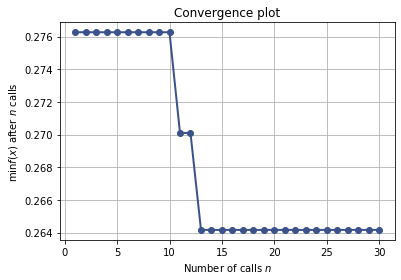

In [21]:
skopt.plots.plot_convergence(results)

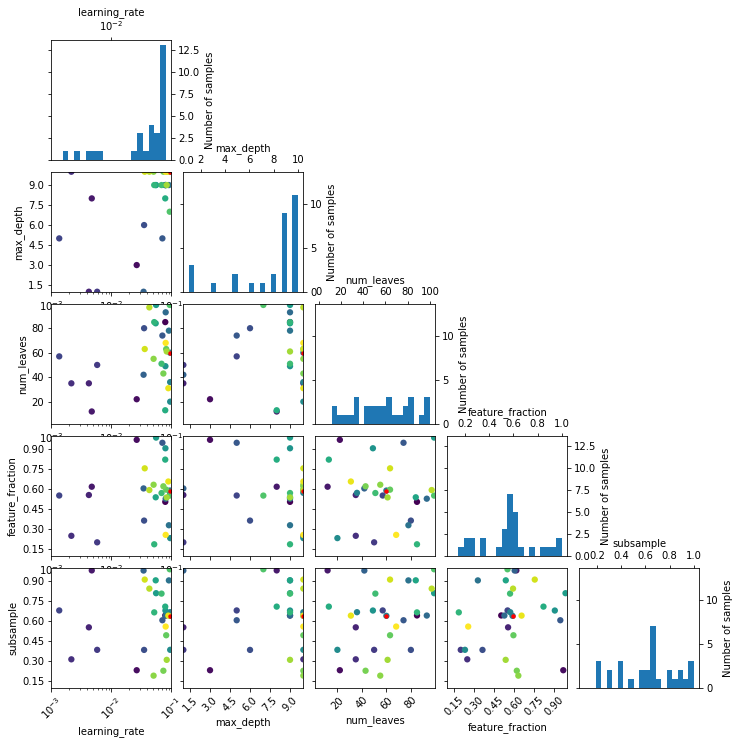

In [22]:
g = skopt.plots.plot_evaluations(results)

In [23]:
# check with auc
search_params = {
    'learning_rate' : results.x[0],
    'max_depth' : results.x[1],
    'num_leaves': results.x[2],
    'feature_fraction': results.x[3],
    'subsample': results.x[4],
}

X = df_train_sample.drop(['device_id', 'event_id', 'gender','age_cate', 'age'], axis=1)
label_encode = le.fit_transform(df_train_sample['gender'], )
#     label_encode
y = label_encode
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234)

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

params = {
        'objective': 'multiclass', 'num_class': 2,
          'metric': 'multi_logloss',

          **search_params}

model = lgb.train(params, train_data,
                      num_boost_round=100,
                      early_stopping_rounds=30,
                      valid_sets=[valid_data],
                      valid_names=['valid'],
                  verbose_eval = 10
             )


Training until validation scores don't improve for 30 rounds
[10]	valid's multi_logloss: 0.458062
[20]	valid's multi_logloss: 0.401588
[30]	valid's multi_logloss: 0.364103
[40]	valid's multi_logloss: 0.340408
[50]	valid's multi_logloss: 0.324669
[60]	valid's multi_logloss: 0.311029
[70]	valid's multi_logloss: 0.297579
[80]	valid's multi_logloss: 0.282718
[90]	valid's multi_logloss: 0.270965
[100]	valid's multi_logloss: 0.263134
Did not meet early stopping. Best iteration is:
[100]	valid's multi_logloss: 0.263134


In [ ]:
stop here

# save the model

In [24]:
model.save_model('lgb_classifier.txt', num_iteration=model.best_iteration) 
model = lgb.Booster(model_file='lgb_classifier.txt')

In [25]:
y_prob = model.predict(data = X_valid)
y_prob

array([[0.0394767 , 0.9605233 ],
       [0.20806547, 0.79193453],
       [0.49996719, 0.50003281],
       ...,
       [0.43821047, 0.56178953],
       [0.15021319, 0.84978681],
       [0.01396859, 0.98603141]])

In [26]:
y_pred = model.predict(data = X_valid, raw_score=True)
y_pred

array([[-2.46298878,  0.72877876],
       [-1.48856515, -0.15193922],
       [-0.92549456, -0.92536332],
       ...,
       [-1.00994163, -0.76151366],
       [-1.7820587 , -0.04912875],
       [-2.88710886,  1.36976836]])

In [27]:
y_valid

array([1, 1, 1, ..., 0, 1, 1])

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score

In [29]:
roc_auc_score(y_true = y_valid,
    y_score = y_prob[:,1],)

0.9675869326850851

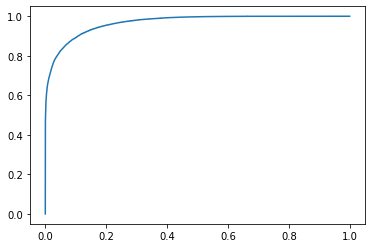

In [30]:
fpr, tpr, thres = roc_curve(y_true = y_valid, 
          y_score = y_prob[:,1],)
plt.plot(fpr, tpr)

In [31]:
thres

array([1.99982632, 0.99982632, 0.99981325, ..., 0.00309345, 0.00308251,
       0.00290531])

In [32]:
df_tmp = pd.DataFrame({'fpr':fpr, 'thres': thres})
df_tmp

,fpr,thres
0,0.000000,1.999826
1,0.000000,0.999826
2,0.000000,0.999813
3,0.000000,0.999741
4,0.000000,0.999730
...,...,...
240919,0.999964,0.003204
240920,0.999973,0.003126
240921,0.999987,0.003093
240922,0.999991,0.003083


In [33]:
df_tmp = pd.DataFrame({'fpr':fpr, 'thres': thres})
# df_tmp

thres_critical_list = []
for x in [0.1, 0.2]:
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argsort()[:1]].values[0])
# thres_critical_list

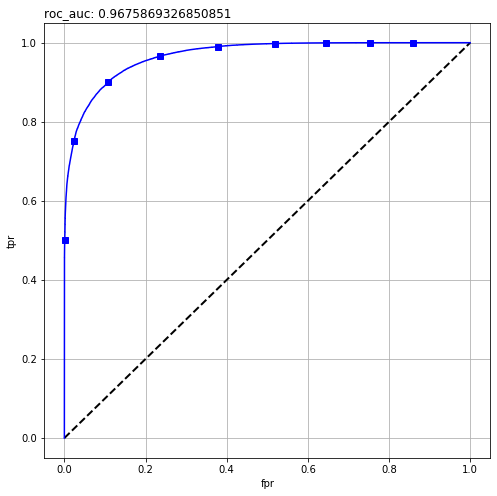

In [34]:
# roc curve with threshold

fig, ax = plt.subplots(figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
fpr, tpr, thres = roc_curve(y_true = y_valid, 
          y_score = y_prob[:,1],)
roc_auc = auc(fpr, tpr)
df_tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.1,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(fpr, tpr, 'b')
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,1], 's', color='b')
# ax.plot(fpr, thres, markeredgecolor='r', linestyle='dashed', color='r')
# ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,2], 's', color='r')
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')

ax.set_ylim(-0.05,1.05)
ax.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc_auc: {}'.format(roc_auc), loc='left')
plt.show()

(-0.05, 1.05)

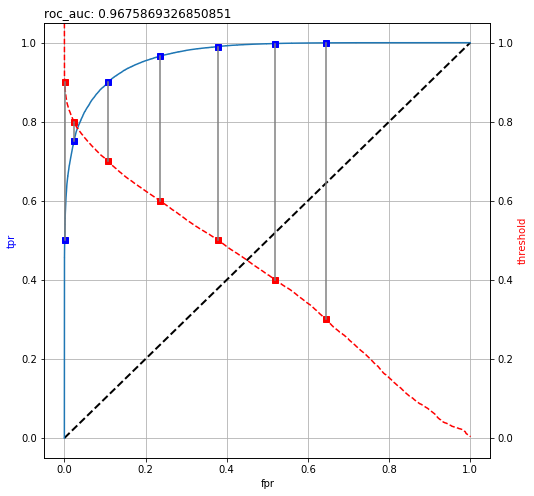

In [35]:
# roc curve with threshold

fig, ax = plt.subplots(figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
fpr, tpr, thres = roc_curve(y_true = y_valid, 
          y_score = y_prob[:,1],)
roc_auc = auc(fpr, tpr)

df_tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.3,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(fpr, tpr)
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,1], 's', color='b')
ax.plot(fpr, thres, markeredgecolor='r', linestyle='dashed', color='r', alpha=1)
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,2], 's', color='r', alpha=1)

# vertical line (blue-red)
ax.plot([np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,0]], 
        [np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,2]], '-', color='gray',
#         alpha=0.2
       )

# # horisontal line (gray-red)
# ax.plot([np.array(thres_critical_list)[:,0],np.ones(len(np.array(thres_critical_list)))*1.05], 
#         [np.array(thres_critical_list)[:,2],np.array(thres_critical_list)[:,2] ,], '-', color='r', alpha=0.2)

ax.set_ylim(-0.05,1.05)
ax.set_xlim(-0.05,1.05)
ax.grid()
plt.xlabel('fpr')
plt.ylabel('tpr', c='b')
plt.title('roc_auc: {}'.format(roc_auc), loc='left')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r', alpha=1)
ax2.set_ylim(-0.05,1.05)

In [36]:
from sklearn.preprocessing import label_binarize
y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

(-0.05, 1.05)

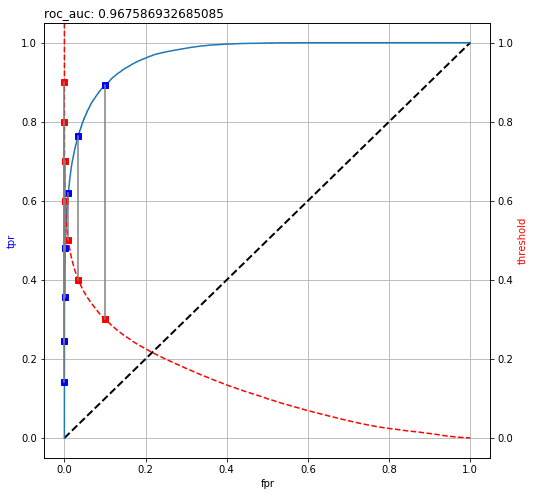

In [37]:
# roc curve with threshold class-0

fig, ax = plt.subplots(figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
fpr, tpr, thres = roc_curve(y_true = y_valid_bi[:,0], 
          y_score = y_prob[:,0],)
roc_auc = auc(fpr, tpr)

df_tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.3,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(fpr, tpr)
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,1], 's', color='b')
ax.plot(fpr, thres, markeredgecolor='r', linestyle='dashed', color='r', alpha=1)
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,2], 's', color='r', alpha=1)

# vertical line (blue-red)
ax.plot([np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,0]], 
        [np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,2]], '-', color='gray',
#         alpha=0.2
       )

# # horisontal line (gray-red)
# ax.plot([np.array(thres_critical_list)[:,0],np.ones(len(np.array(thres_critical_list)))*1.05], 
#         [np.array(thres_critical_list)[:,2],np.array(thres_critical_list)[:,2] ,], '-', color='r', alpha=0.2)

ax.set_ylim(-0.05,1.05)
ax.set_xlim(-0.05,1.05)
ax.grid()
plt.xlabel('fpr')
plt.ylabel('tpr', c='b')
plt.title('roc_auc: {}'.format(roc_auc), loc='left')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r', alpha=1)
ax2.set_ylim(-0.05,1.05)

In [39]:
# stope here

(-0.05, 1.05)

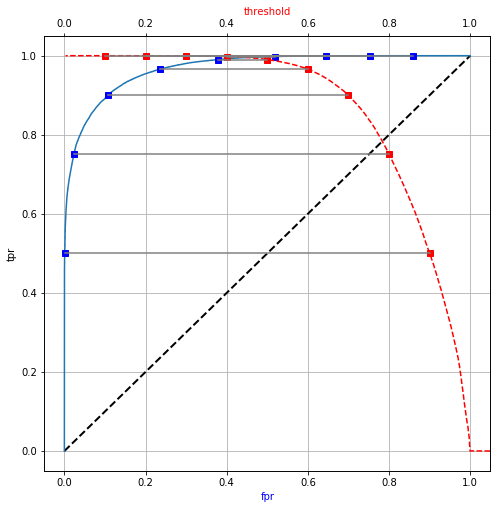

In [40]:
# roc curve with threshold (the other way around) NOT VERY READABLE

fig, ax = plt.subplots(figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
fpr, tpr, thres = roc_curve(y_true = y_valid, 
          y_score = y_prob[:,1],)
df_tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.1,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(fpr, tpr)
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,1], 's', color='b')
ax.plot(thres, tpr, markeredgecolor='r', linestyle='dashed', color='r')
ax.plot(np.array(thres_critical_list)[:,2], np.array(thres_critical_list)[:,1], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], 
        [np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], '-', color='gray')


ax.set_ylim(-0.05,1.05)
ax.set_xlim(-0.05,1.05)
ax.grid()
plt.xlabel('fpr', c='b')
plt.ylabel('tpr')
ax2 = ax.twiny()
ax2.set_xlabel('threshold', c='r')
ax2.set_xlim(-0.05,1.05)

In [41]:
len(y_prob)

898197

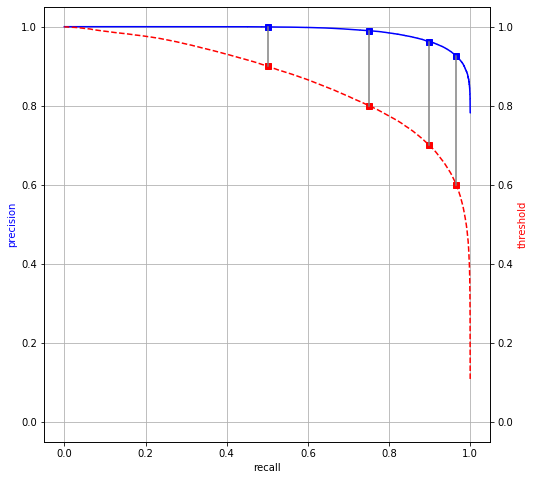

In [42]:
# precision-recall curve with threshold
from sklearn.metrics import precision_recall_curve

fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_valid, 
          probas_pred = y_prob[:,1],)
thres = np.append(thres, 1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.6,0.9,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, markeredgecolor='r', linestyle='dashed', color='r')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '-', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='blue')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

In [43]:
from sklearn.preprocessing import label_binarize
y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

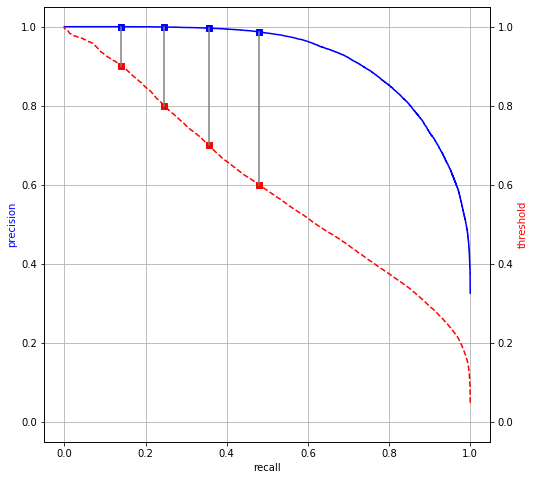

In [44]:
# class-0
# precision-recall curve with threshold
from sklearn.metrics import precision_recall_curve

fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_valid_bi[:,0], 
          probas_pred = y_prob[:,0],)
thres = np.append(thres, 1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.6,0.9,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, markeredgecolor='r', linestyle='dashed', color='r')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '-', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='blue')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

In [45]:
# multi class roc auc
# ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# it is no surprise roc is the same when it comes to binary classfication. 
# but this is to prepare for multiclass classification

In [46]:
from sklearn.preprocessing import label_binarize
y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bi[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_bi[:,:2].ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':


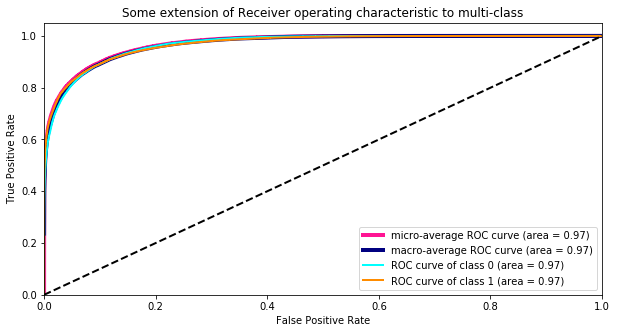

In [47]:
from scipy import interp
from itertools import cycle
lw = 2
n_classes = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', 
#          linestyle=':', 
         linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', 
#          linestyle=':', 
         linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [48]:
print(classification_report(y_true = y_valid,  
                            y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1),
                            labels=range(2),
                            target_names=le.classes_,
                           ),  
 )

              precision    recall  f1-score   support

           F       0.95      0.62      0.75    222223
           M       0.89      0.99      0.94    675974

    accuracy                           0.90    898197
   macro avg       0.92      0.81      0.84    898197
weighted avg       0.90      0.90      0.89    898197



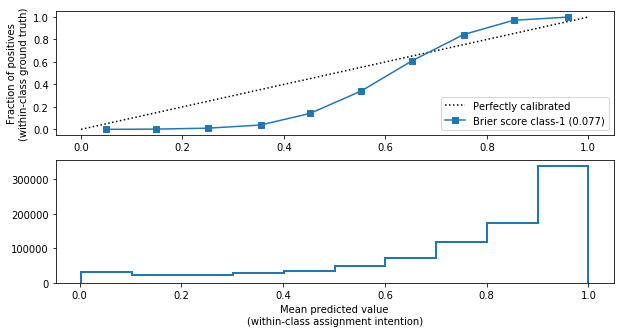

In [49]:
# probability calibration (evaluation)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss

fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_valid, y_prob[:,1], n_bins=10)
clf_score = brier_score_loss(y_valid, y_prob[:,1], 
#                              pos_label=y.max()
                            )

fig ,axes = plt.subplots(2,1, figsize=(10, 5))

# ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax = axes[0]
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % ('Brier score class-1', clf_score))

ax.legend(loc="lower right")
ax.set_ylabel("Fraction of positives\n(within-class ground truth)")

ax=axes[1]
ax.hist(y_prob[:,1],bins=10, histtype="step", lw=2, label='pred')
ax.set_xlabel("Mean predicted value\n(within-class assignment intention)")

plt.show()

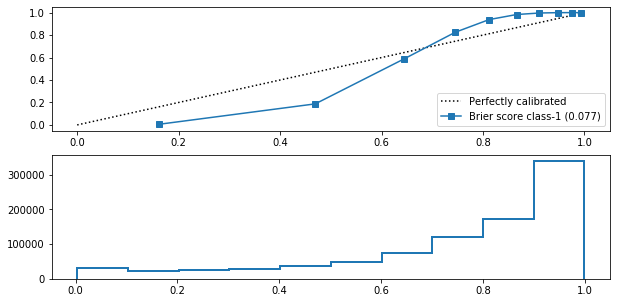

In [50]:
# probability calibration (evaluation) 
# (use qunatil to describe reliability curve)
# uniform : # The bins have identical widths.
# quantile: # The bins have the same number of samples and depend on y_prob
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss

fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_valid, y_prob[:,1], n_bins=10,
                             strategy= 'quantile'
                             )
clf_score = brier_score_loss(y_valid, y_prob[:,1], 
#                              pos_label=y.max()
                            )

fig ,axes = plt.subplots(2,1, figsize=(10, 5))

# ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax = axes[0]
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % ('Brier score class-1', clf_score))

ax.legend(loc="lower right")

ax=axes[1]
ax.hist(y_prob[:,1],bins=10, histtype="step", lw=2, label='pred', 
#         density=True
       )


plt.show()

In [51]:
# The following try to calibrate probaility to micic multi class, but it seems not right.
# it is right, just the 'Brier score is not intuitive

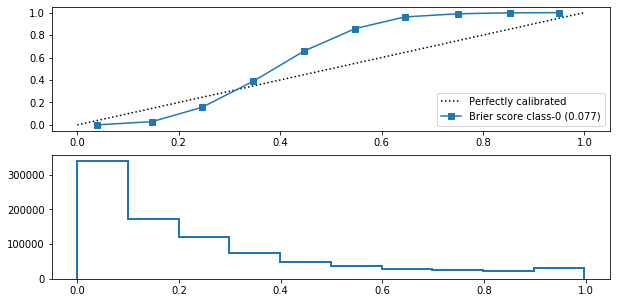

In [52]:
# probability calibration (evaluation)
# from sklearn.calibration import CalibratedClassifierCV, calibration_curve
# from sklearn.metrics import brier_score_loss



y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_valid_bi[:,0], y_prob[:,0], n_bins=10)
clf_score = brier_score_loss(y_valid_bi[:,0], y_prob[:,0], 
#                              pos_label=y.max()
                            )

fig ,axes = plt.subplots(2,1, figsize=(10, 5))

# ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax = axes[0]
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % ('Brier score class-0', clf_score))

ax.legend(loc="lower right")

ax=axes[1]
ax.hist(y_prob[:,0],bins=10, histtype="step", lw=2, label='pred')


plt.show()

In [53]:
y_prob

array([[0.0394767 , 0.9605233 ],
       [0.20806547, 0.79193453],
       [0.49996719, 0.50003281],
       ...,
       [0.43821047, 0.56178953],
       [0.15021319, 0.84978681],
       [0.01396859, 0.98603141]])

In [54]:
from scipy.stats import entropy
1- entropy(y_prob, axis=1)

array([0.8337225 , 0.48861774, 0.30685282, ..., 0.31450827, 0.57692129,
       0.92647038])

(array([169141.,  91460.,  87781.,  79277.,  77294.,  73699.,  72056.,
         72291.,  95892.,  79306.]),
 array([0.30685282, 0.37599979, 0.44514677, 0.51429374, 0.58344072,
        0.65258769, 0.72173467, 0.79088164, 0.86002862, 0.92917559,
        0.99832257]),
 <a list of 10 Patch objects>)

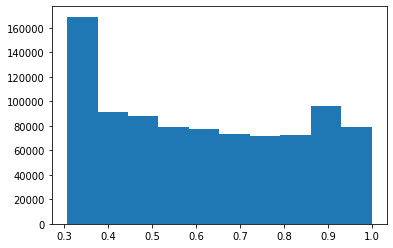

In [55]:
plt.hist(1-entropy(y_prob, axis=1))

# mimic roc to analyze confidence

Text(0.5, 1.0, '0.8914810843293317')

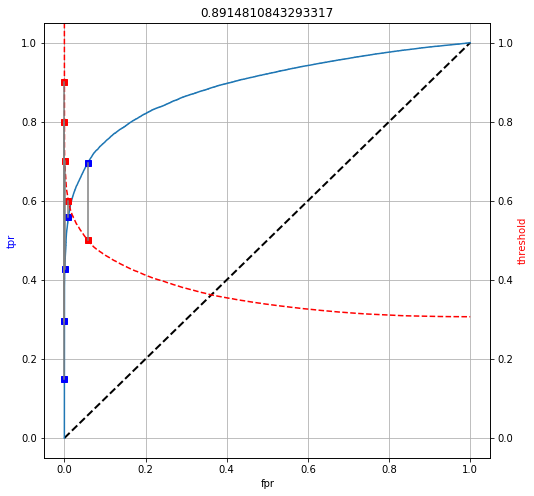

In [56]:
# mimic roc to analyze confidence (NEED TO ANALYZE INTERPRETE CAREFULL, NOT SURE IF IT MAKES SENSE)
# (ALSO, TRY TO ADDRESS IMPACT OF IMBALANCED)
y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
y_pred

df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
df_compare

y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

1- entropy(y_prob, axis=1)

# roc curve with threshold

fig, ax = plt.subplots(figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
fpr, tpr, thres = roc_curve(y_true = y_compare, 
          y_score = 1- entropy(y_prob, axis=1),)
roc_auc = auc(fpr, tpr)
df_tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.5,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(fpr, tpr)
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,1], 's', color='b')
ax.plot(fpr, thres, markeredgecolor='r', linestyle='dashed', color='r', alpha=1)
ax.plot(np.array(thres_critical_list)[:,0], np.array(thres_critical_list)[:,2], 's', color='r', alpha=1)

# vertical line (blue-red)
ax.plot([np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,0]], 
        [np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,2]], '-', color='gray',
#         alpha=0.2
       )

# # horisontal line (gray-red)
# ax.plot([np.array(thres_critical_list)[:,0],np.ones(len(np.array(thres_critical_list)))*1.05], 
#         [np.array(thres_critical_list)[:,2],np.array(thres_critical_list)[:,2] ,], '-', color='r', alpha=0.2)

ax.set_ylim(-0.05,1.05)
ax.set_xlim(-0.05,1.05)
ax.grid()
plt.xlabel('fpr')
plt.ylabel('tpr', c='b')
ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r', alpha=1)
ax2.set_ylim(-0.05,1.05)
ax.set_title(roc_auc)

In [57]:
y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
y_pred

df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
df_compare

y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

1- entropy(y_prob, axis=1)


array([0.8337225 , 0.48861774, 0.30685282, ..., 0.31450827, 0.57692129,
       0.92647038])

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


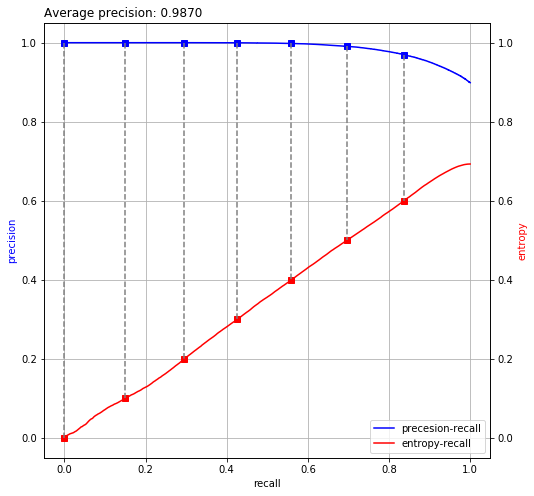

In [58]:
# MIMIC precision-recall curve with threshold (NOT SURE TALKING ABOUT PRECISION RECALL MAKE SENSE)
from sklearn.metrics import precision_recall_curve

# y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
# y_pred

# df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
# df_compare

# y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

# 1- entropy(y_prob, axis=1)


fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_compare, 
          probas_pred = 1- entropy(y_prob, axis=1),)
ap = average_precision_score(y_true = y_compare, 
                             y_score = 1- entropy(y_prob, axis=1))
thres = 1- np.append(thres, 1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.0,0.7,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue', label='precesion-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, color='r', label='entropy-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '--', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='b')
plt.title('Average precision: {:.4f}'.format(ap), loc='left')
ax.legend()

ax2 = ax.twinx()
ax2.set_ylabel('entropy', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

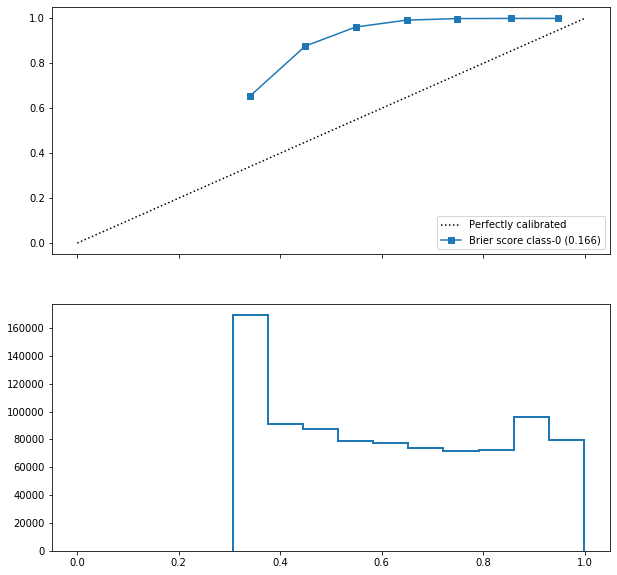

In [59]:
# use (self-)entroy to indicate confidence level (NEED TO CAREFULLY INTERPRETE THIS. DOESN'T MAKE MUCH SENSE to ME SO FAR)

# y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
y_pred

# df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
df_compare

# y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values
y_compare

y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

y_prob_mimic = 1- entropy(y_prob, axis=1)

fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_true=y_compare,
                              y_prob= y_prob_mimic, 
                         n_bins=10)
clf_score = brier_score_loss(y_compare, y_prob_mimic, 
#                              pos_label=y.max()
                            )

fig ,axes = plt.subplots(2,1, figsize=(10, 10), sharex=True)

# ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax = axes[0]
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % ('Brier score class-0', clf_score))

ax.legend(loc="lower right")
# ax.set_box_aspect(1)

ax=axes[1]
ax.hist(y_prob_mimic,bins=10, histtype="step", lw=2, label='pred')


plt.show()

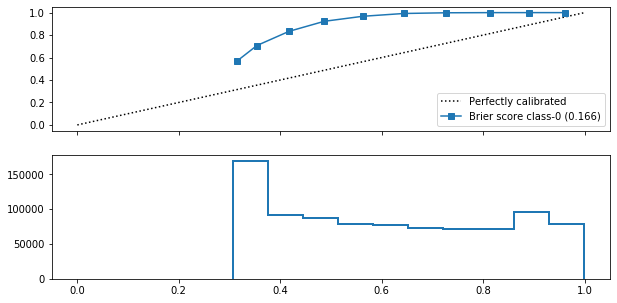

In [60]:
# use (self-)entroy to indicate confidence level (NEED TO CAREFULLY INTERPRETE THIS. DOESN'T MAKE MUCH SENSE to ME SO FAR)

# y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
# y_pred

# df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
# df_compare

# y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

y_prob_mimic = 1- entropy(y_prob, axis=1)

fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_true=y_compare,
                              y_prob= y_prob_mimic, 
                              strategy= 'quantile',
                         n_bins=10)
clf_score = brier_score_loss(y_compare, y_prob_mimic, 
#                              pos_label=y.max()
                            )

fig ,axes = plt.subplots(2,1, figsize=(10, 5), sharex=True)

# ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax = axes[0]
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % ('Brier score class-0', clf_score))

ax.legend(loc="lower right")

ax=axes[1]
ax.hist(y_prob_mimic,bins=10, histtype="step", lw=2, label='pred')


plt.show()

In [61]:
# MAYBE I SHOULD TRY TO USE CROSS-ENTROPY instead of (SELF-)ENTROPY

In [62]:
# this is too slow
# from sklearn.metrics import log_loss
# cross_entropy = [log_loss(y_valid_bi[i,:2], y_prob[i], ) for i in range(len(y_prob))]

(array([6.47156e+05, 1.40133e+05, 5.58260e+04, 3.12810e+04, 1.59570e+04,
        5.73100e+03, 1.65500e+03, 3.76000e+02, 6.90000e+01, 1.30000e+01]),
 array([1.73694291e-04, 3.02581713e-01, 6.04989732e-01, 9.07397751e-01,
        1.20980577e+00, 1.51221379e+00, 1.81462181e+00, 2.11702983e+00,
        2.41943785e+00, 2.72184587e+00, 3.02425388e+00]),
 <a list of 10 Patch objects>)

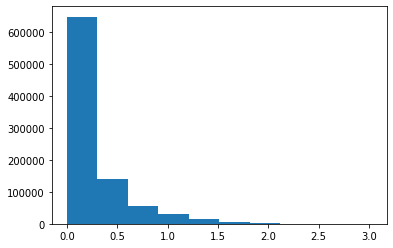

In [63]:
cross_entropy = entropy(pk=y_valid_bi[:,:2], qk= y_prob,  axis=1)
cross_entropy
plt.hist(cross_entropy)

In [64]:
# normalized sigmoid this using  expit
from scipy.special import expit
cross_entropy = expit(cross_entropy)

(array([5.06289e+05, 1.87230e+05, 8.12710e+04, 4.62000e+04, 3.15540e+04,
        2.26920e+04, 1.46740e+04, 6.44300e+03, 1.63200e+03, 2.12000e+02]),
 array([0.50004342, 0.54540487, 0.59076632, 0.63612776, 0.68148921,
        0.72685066, 0.7722121 , 0.81757355, 0.86293499, 0.90829644,
        0.95365789]),
 <a list of 10 Patch objects>)

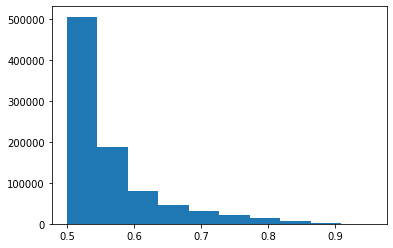

In [65]:
plt.hist(cross_entropy)

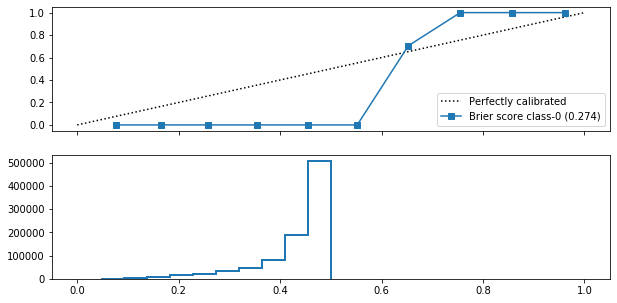

In [66]:
# use (self-)entroy to indicate confidence level (NEED TO CAREFULLY INTERPRETE THIS. DOESN'T MAKE MUCH SENSE to ME SO FAR)

# y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
# y_pred

# df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
# df_compare

# y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

# y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

y_prob_mimic = 1- np.array(cross_entropy)

fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_true=y_compare,
                              y_prob= y_prob_mimic, 
                              normalize = True,
                         n_bins=10)
clf_score = brier_score_loss(y_compare, y_prob_mimic,
#                              pos_label=y.max()
                            )

fig ,axes = plt.subplots(2,1, figsize=(10, 5), sharex=True)

# ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax = axes[0]
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % ('Brier score class-0', clf_score))

ax.legend(loc="lower right")

ax=axes[1]
ax.hist(y_prob_mimic,bins=10, histtype="step", lw=2, label='pred')


plt.show()

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


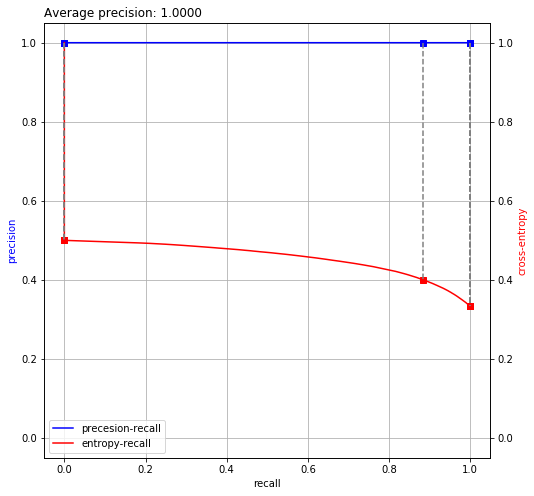

In [67]:
# MIMIC precision-recall curve with threshold (NOT SURE TALKING ABOUT PRECISION RECALL MAKE SENSE)
# THIS IS ALL WRONG, WE SHOULD NOT USE CROSS_ENTROPY
from sklearn.metrics import precision_recall_curve

# y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
# y_pred

# df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
# df_compare

# y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

# 1- entropy(y_prob, axis=1)
y_prob_mimic = 1- np.array(cross_entropy)

fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_compare, 
          probas_pred = y_prob_mimic,)
ap = average_precision_score(y_true = y_compare, 
                             y_score = y_prob_mimic)
thres = np.append(thres,1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.0,0.7,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue', label='precesion-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, color='r', label='entropy-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '--', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='b')
plt.title('Average precision: {:.4f}'.format(ap), loc='left')
ax.legend()

ax2 = ax.twinx()
ax2.set_ylabel('cross-entropy', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

# overall performance
# converge to the original task

In [68]:
X_valid

,app_id,label_id,brand_parse,model_parse,longitude,latitude,hour_plus_four,is_active,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device
1117718,1081301425634924658,775,Huawei,Mate 7,0.00,0.00,10,1.0,88,172,142
2389438,-653184325026622087,1015,Kupai,Okami Note3,0.00,0.00,19,1.0,55,33,77
609328,5729517255058371973,405,Samsung,Galaxy Note 2,87.56,43.87,12,1.0,82,16,36
3398984,1977658975649789753,303,Huawei,Glory 7,0.00,0.00,14,0.0,633,173,171
2480011,3683147815759994238,756,Samsung,Galaxy S6,0.00,0.00,14,0.0,58,54,103
...,...,...,...,...,...,...,...,...,...,...,...
2509731,1000519352029378378,405,Xiaomi,MI 4,0.00,0.00,18,0.0,87,76,119
2617416,5639734538864903205,306,Kupai,F2,0.00,0.00,13,0.0,39,67,104
1723594,8693964245073640147,172,Meizu,Charm blue metal,0.00,0.00,4,0.0,25,29,59
3059948,8845251844360692488,756,Huawei,Glory Play 4X,0.00,0.00,23,0.0,58,70,133


In [69]:
df_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4490982 entries, 0 to 4999999
Data columns (total 16 columns):
 #   Column               Dtype   
---  ------               -----   
 0   device_id            category
 1   event_id             category
 2   app_id               category
 3   label_id             category
 4   brand_parse          category
 5   model_parse          category
 6   longitude            float64 
 7   latitude             float64 
 8   hour_plus_four       int8    
 9   is_active            category
 10  event_cnt_by_device  int64   
 11  app_cnt_by_device    int64   
 12  label_cnt_by_device  int64   
 13  gender               category
 14  age_cate             category
 15  age                  int8    
dtypes: category(9), float64(2), int64(3), int8(2)
memory usage: 307.2 MB


In [70]:
X_id = df_train_sample[['device_id', 'gender', 'hour_plus_four', 'event_cnt_by_device', 'app_cnt_by_device', 'label_cnt_by_device']]
label_encode = le.fit_transform(df_train_sample['gender'], )
#     label_encode
# y = label_encode
X_train_id, X_valid_id = train_test_split(X_id, test_size=0.2, random_state=1234)

In [71]:
X_valid_id.head()

,device_id,gender,hour_plus_four,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device
1117718,-1665198983206396063,M,10,88,172,142
2389438,-8139136456862037982,M,19,55,33,77
609328,-7006537844510982876,M,12,82,16,36
3398984,-8926211772892695918,F,14,633,173,171
2480011,4677933092797885820,F,14,58,54,103


In [72]:
X_valid_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898197 entries, 1117718 to 21641
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   device_id            898197 non-null  category
 1   gender               898197 non-null  category
 2   hour_plus_four       898197 non-null  int8    
 3   event_cnt_by_device  898197 non-null  int64   
 4   app_cnt_by_device    898197 non-null  int64   
 5   label_cnt_by_device  898197 non-null  int64   
dtypes: category(2), int64(3), int8(1)
memory usage: 31.2 MB


In [73]:
y_prob = model.predict(data = X_valid)
# y_prob
df_prob_id = pd.DataFrame(y_prob)
df_prob_id.columns = ['F', 'M']
df_prob_id.index = X_valid_id.index
df_prob_id.head()

,F,M
1117718,0.039477,0.960523
2389438,0.208065,0.791935
609328,0.499967,0.500033
3398984,0.979903,0.020097
2480011,0.387125,0.612875


In [74]:
df_prob_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898197 entries, 1117718 to 21641
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   F       898197 non-null  float64
 1   M       898197 non-null  float64
dtypes: float64(2)
memory usage: 20.6 MB


In [75]:
df_original_task = pd.concat([X_valid_id, df_prob_id], axis=1, )
df_original_task.head()

,device_id,gender,hour_plus_four,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device,F,M
1117718,-1665198983206396063,M,10,88,172,142,0.039477,0.960523
2389438,-8139136456862037982,M,19,55,33,77,0.208065,0.791935
609328,-7006537844510982876,M,12,82,16,36,0.499967,0.500033
3398984,-8926211772892695918,F,14,633,173,171,0.979903,0.020097
2480011,4677933092797885820,F,14,58,54,103,0.387125,0.612875


In [76]:
df_original_task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898197 entries, 1117718 to 21641
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   device_id            898197 non-null  category
 1   gender               898197 non-null  category
 2   hour_plus_four       898197 non-null  int8    
 3   event_cnt_by_device  898197 non-null  int64   
 4   app_cnt_by_device    898197 non-null  int64   
 5   label_cnt_by_device  898197 non-null  int64   
 6   F                    898197 non-null  float64 
 7   M                    898197 non-null  float64 
dtypes: category(2), float64(2), int64(3), int8(1)
memory usage: 44.9 MB


In [77]:
df_original_task.isna().any()

device_id              False
gender                 False
hour_plus_four         False
event_cnt_by_device    False
app_cnt_by_device      False
label_cnt_by_device    False
F                      False
M                      False
dtype: bool

# be careful, the device_id 'category' type stored all the original labels, so it appears null

In [78]:
df_original_task.groupby('device_id').mean().isna().any()

hour_plus_four         True
event_cnt_by_device    True
app_cnt_by_device      True
label_cnt_by_device    True
F                      True
M                      True
dtype: bool

In [79]:
df_original_task.drop('gender', axis=1).groupby('device_id').mean().dropna().reset_index()

,device_id,hour_plus_four,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device,F,M
0,-9222956879900151005,18.415385,65.0,73.0,57.0,0.124105,0.875895
1,-9221026417907250887,13.328947,147.0,39.0,62.0,0.365649,0.634351
2,-9220061629197656378,15.757396,52.0,85.0,122.0,0.063859,0.936141
3,-9212412905070443687,12.888889,28.0,28.0,61.0,0.080115,0.919885
4,-9209849644716288960,17.008621,76.0,32.0,73.0,0.570759,0.429241
...,...,...,...,...,...,...,...
8983,9214973890298048476,13.078431,22.0,39.0,66.0,0.605969,0.394031
8984,9216925254504446539,19.261261,109.0,85.0,131.0,0.305844,0.694156
8985,9219164468944552013,16.522167,780.0,71.0,100.0,0.051032,0.948968
8986,9219842210460037807,14.833333,30.0,31.0,55.0,0.328387,0.671613


In [80]:
df_original_task.groupby('device_id').gender.first().dropna().reset_index()

,device_id,gender
0,-9222956879900151005,M
1,-9221026417907250887,F
2,-9220061629197656378,M
3,-9212412905070443687,M
4,-9209849644716288960,F
...,...,...
8983,9214973890298048476,F
8984,9216925254504446539,M
8985,9219164468944552013,M
8986,9219842210460037807,F


In [81]:
df_performance = pd.concat([df_original_task.drop('gender', axis=1).groupby('device_id').mean().dropna().reset_index(),
                           df_original_task.groupby('device_id').gender.first().dropna().reset_index()[['gender']]],axis=1)
df_performance.head()

,device_id,hour_plus_four,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device,F,M,gender
0,-9222956879900151005,18.415385,65.0,73.0,57.0,0.124105,0.875895,M
1,-9221026417907250887,13.328947,147.0,39.0,62.0,0.365649,0.634351,F
2,-9220061629197656378,15.757396,52.0,85.0,122.0,0.063859,0.936141,M
3,-9212412905070443687,12.888889,28.0,28.0,61.0,0.080115,0.919885,M
4,-9209849644716288960,17.008621,76.0,32.0,73.0,0.570759,0.429241,F


In [82]:
### evaluation the original task

In [83]:
y_prob = df_performance[['F', 'M']].values
y_valid = le.transform(df_performance.gender)
# y_valid

In [84]:
from sklearn.preprocessing import label_binarize
y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bi[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_bi[:,:2].ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


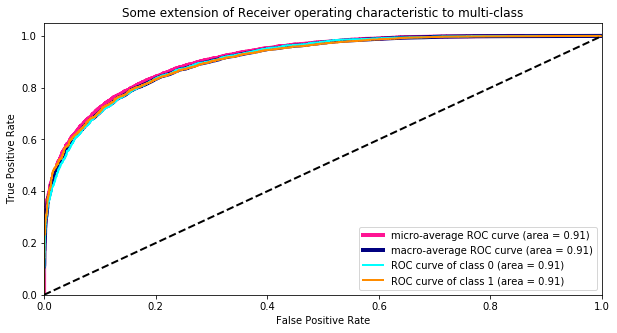

In [85]:
from scipy import interp
from itertools import cycle
lw = 2
n_classes = 2



# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', 
#          linestyle=':', 
         linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', 
#          linestyle=':', 
         linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [86]:
print(classification_report(y_true = y_valid,  
                            y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1),
                            labels=range(2),
                            target_names=le.classes_,
                           ),  
 )

              precision    recall  f1-score   support

           F       0.90      0.47      0.62      2737
           M       0.81      0.98      0.88      6251

    accuracy                           0.82      8988
   macro avg       0.85      0.72      0.75      8988
weighted avg       0.84      0.82      0.80      8988



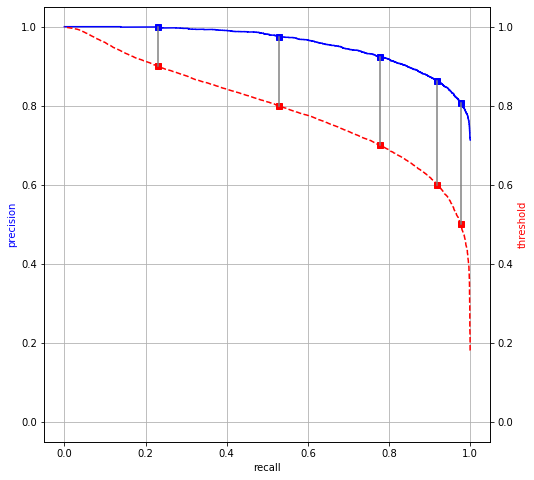

In [87]:
# precision-recall curve with threshold
from sklearn.metrics import precision_recall_curve

fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_valid, 
          probas_pred = y_prob[:,1],)
thres = np.append(thres, 1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.5,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, markeredgecolor='r', linestyle='dashed', color='r')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '-', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='blue')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

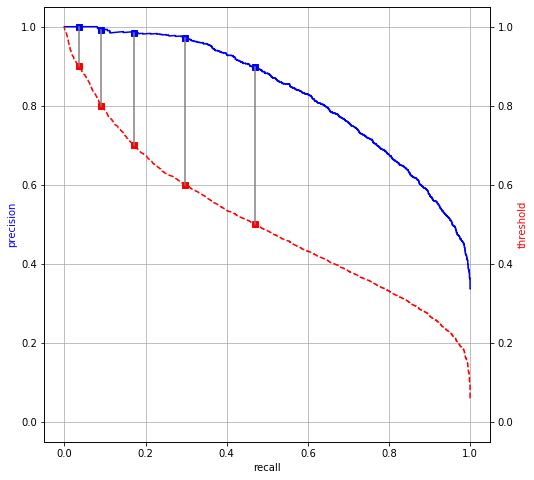

In [88]:
# class-0
# precision-recall curve with threshold
from sklearn.metrics import precision_recall_curve

fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_valid_bi[:,0], 
          probas_pred = y_prob[:,0],)
thres = np.append(thres, 1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.5,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, markeredgecolor='r', linestyle='dashed', color='r')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '-', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='blue')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

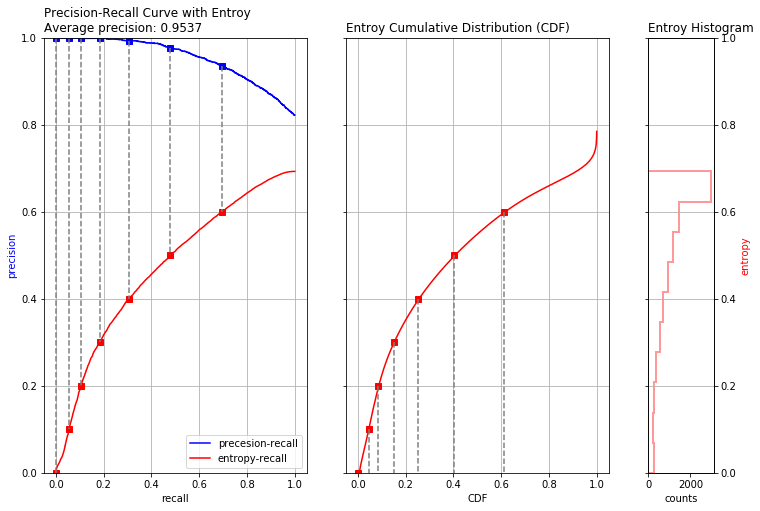

In [89]:
# confidence
# MIMIC precision-recall curve with threshold (NOT SURE TALKING ABOUT PRECISION RECALL MAKE SENSE)
from sklearn.metrics import precision_recall_curve
from statsmodels.distributions.empirical_distribution import ECDF # manually calcuate CDF


y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
y_pred

df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
df_compare

y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

1- entropy(y_prob, axis=1)

fig, axes = plt.subplots(1,3, figsize=(12,8), sharey=True, gridspec_kw={'width_ratios': [2,2,0.5]})
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_compare, 
          probas_pred = 1- entropy(y_prob, axis=1),)
ap = average_precision_score(y_true = y_compare, 
                             y_score = 1- entropy(y_prob, axis=1))
thres = 1- np.append(thres, 1)

df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.0,0.7,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list
ax=axes[0]
ax.plot(recall, precision, c='blue', label='precesion-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, color='r', label='entropy-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '--', color='gray')


# ax.set_ylim(-0.05,1.05)
ax.set_ylim(0,1)
ax.set_xlabel('recall')
ax.set_ylabel('precision', c='b')
ax.set_title('Precision-Recall Curve with Entroy\nAverage precision: {:.4f}'.format(ap), loc='left')
ax.legend()



ax.grid()


# axis 2
ecdf = ECDF(thres)
df_tmp_2 = pd.DataFrame({'sample':ecdf.x, 'ecdf':ecdf.y,})
# df_tmp
thres_critical_list_2 = []
for x in np.arange(0.0,0.7,0.1):
    thres_critical_list_2.append(df_tmp_2.iloc[(df_tmp_2['sample']-x).abs().argmin()].values)
thres_critical_list_2 = np.array(thres_critical_list_2)

ax = axes[1]
sns.kdeplot(data=entropy(y_prob, axis=1), vertical=True, cumulative=True, color='r', ax=ax)
# kwargs = {'cumulative': True}
# sns.distplot(entropy(y_prob, axis=1), vertical=True, color='r', hist_kws=kwargs, kde_kws=kwargs, ax=ax, bins=5)
# ax.plot(ecdf.y, ecdf.x, c='r')
ax.plot(np.array(thres_critical_list_2)[:,1], np.array(thres_critical_list_2)[:,0], 's', color='r')
ax.plot([thres_critical_list_2[:,1], thres_critical_list_2[:,1]],
        [thres_critical_list_2[:,0], np.zeros(len(thres_critical_list_2))], '--', color='gray')
ax.grid()
ax.set_title('Entroy Cumulative Distribution (CDF)', loc='left')
ax.set_xlabel('CDF', )

ax = axes[2]
sns.distplot(thres, vertical=True, 
             kde=False, 
             hist_kws={"histtype": "step", 'linewidth': 2,},              
             color='r', bins=10, ax=ax)
ax.grid(axis='y')
ax.set_title('Entroy Histogram', loc='left')
ax.set_xlabel('counts', )
ax2 = ax.twinx()
ax2.set_ylabel('entropy', c='r')
# ax2.set_ylim(-0.05,1.05)
ax2.set_ylim(0,1)

plt.show()

In [90]:
# INVENTION a compact version

# A more intuitive plot for application may be to use associated entropy based on cdf(proportion) as critical point
# before we predefin critical point as 0.1, 0.2, 0.3 etc.

In [91]:
entropy_array = entropy(y_prob, axis=1)
critical_points = np.quantile(entropy_array, np.arange(0,1,0.1))

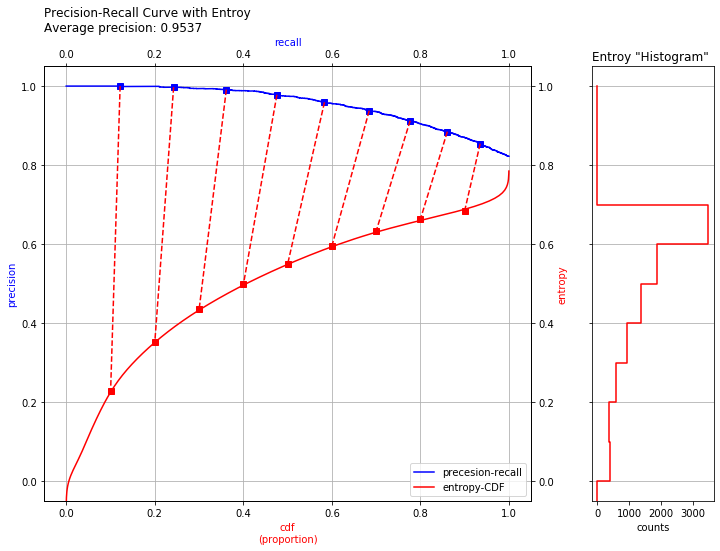

In [92]:
# confidence
# MIMIC precision-recall curve with threshold (NOT SURE TALKING ABOUT PRECISION RECALL MAKE SENSE)
from sklearn.metrics import precision_recall_curve
from statsmodels.distributions.empirical_distribution import ECDF # manually calcuate CDF


y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
y_pred

df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
df_compare

y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

1- entropy(y_prob, axis=1)

entropy_array = entropy(y_prob, axis=1)
critical_points = np.quantile(entropy_array, np.arange(0.1,1,0.1))
critical_points

fig, axes = plt.subplots(1,2, figsize=(12,8), sharey=True, gridspec_kw={'width_ratios': [2,0.5]})

# precision-recall curve
precision, recall, thres = precision_recall_curve(y_true = y_compare, 
          probas_pred = 1- entropy(y_prob, axis=1),)
ap = average_precision_score(y_true = y_compare, 
                             y_score = 1- entropy(y_prob, axis=1))
thres = 1- np.append(thres, 1)

df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in critical_points:
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list
ax=axes[0]
ax.plot(recall, precision, c='blue', label='precesion-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')

# entropy-cdf curve
ecdf = ECDF(thres)
df_tmp_2 = pd.DataFrame({'sample':ecdf.x, 'ecdf':ecdf.y,})
# df_tmp
thres_critical_list_2 = []
for x in critical_points:
    thres_critical_list_2.append(df_tmp_2.iloc[(df_tmp_2['sample']-x).abs().argmin()].values)
thres_critical_list_2 = np.array(thres_critical_list_2)

sns.kdeplot(data=entropy(y_prob, axis=1), vertical=True, cumulative=True, color='r', label='entropy-CDF', ax=ax)
ax.plot(np.array(thres_critical_list_2)[:,1], np.array(thres_critical_list_2)[:,0], 's', color='r')


# connection lines 
ax.plot([np.array(thres_critical_list)[:,1],thres_critical_list_2[:,1]], 
        [np.array(thres_critical_list)[:,0],thres_critical_list_2[:,0]], '--', color='r')

ax.set_ylim(-0.05,1.05)
# ax.set_ylim(0,1)
ax.set_xlabel('cdf\n(proportion)', c='r')
ax.set_ylabel('precision', c='b')
ax.set_title('Precision-Recall Curve with Entroy\nAverage precision: {:.4f}'.format(ap), loc='left')
ax.legend(loc='lower right')

ax2 = ax.twinx()
ax2.set_ylabel('entropy', c='r')
ax2.set_ylim(-0.05,1.05)
ax3 = ax.twiny()
ax3.set_xlabel('recall', c='b')
ax3.set_xlim(-0.05,1.05)

ax.grid()



# axis no.2
ax = axes[1]
thres_count_list =[]
for x in np.arange(-0.1,1.2,0.1):
    thres_count_list.append(df_tmp.sort_index(ascending=False).iloc[(df_tmp['thres']-x).abs().argmin()].name)
thres_count_list
np.diff(thres_count_list)
df_count_tmp = df_tmp.thres.apply(lambda x: (int(x *10)+1)/10).value_counts().sort_index()
# df_count_tmp
value_tmp = np.concatenate(([0],df_count_tmp.values,))
index_tmp = np.concatenate(([df_count_tmp.index[-1]+0.1],df_count_tmp.index,))
# sns.lineplot(df_count_tmp.values, df_count_tmp.index             ,
#              drawstyle='steps-post', 
#              color = 'r',
#              ax=ax)
ax.step(np.diff(thres_count_list), np.arange(-0.1,1.2,0.1)[:-1],
              where='pre', 
             color = 'r',
             )
ax.grid(axis='y')
ax.set_title('Entroy "Histogram"', loc='left')
ax.set_xlabel('counts', )


plt.show()

# last evaluation on hold out set

In [93]:
df_holdout.head()

,device_id,event_id,app_id,label_id,brand_parse,model_parse,longitude,latitude,hour_plus_four,is_active,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device,gender,age_cate,age
1,2526025498254449332,1978897,-747926486627391271,713,Samsung,Galaxy Grand,114.37,30.60,25,1.0,1310,77,94,M,A32-40,34
2,2526025498254449332,1384037,8693964245073640147,172,Samsung,Galaxy Grand,114.37,30.61,13,1.0,1310,77,94,M,A32-40,34
11,7176282351422486534,1416429,6965654211116534216,783,Huawei,Glory 7,0.00,0.00,27,0.0,58,22,61,M,A32-40,35
15,-1287028584385608845,2988189,7971327257373737575,705,Samsung,Galaxy S5,0.00,0.00,8,0.0,59,68,87,M,A32-40,32
25,2526025498254449332,689450,7348340405200054701,186,Samsung,Galaxy Grand,114.37,30.61,24,0.0,1310,77,94,M,A32-40,34


In [94]:
df_train_sample.head()

,device_id,event_id,app_id,label_id,brand_parse,model_parse,longitude,latitude,hour_plus_four,is_active,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device,gender,age_cate,age
0,3592244226009767782,2559251,6806547847175677243,756,LG,G3,0.0,0.0,20,1.0,57,47,46,M,A32-40,36
3,2634148490662474075,2595002,628020936226491308,548,Simi,R5s plus,0.0,0.0,23,0.0,28,39,65,M,A27-28,28
4,4210063776137603404,240752,5001052381732531443,794,OPPO,R7 Plus,0.0,0.0,4,0.0,61,28,46,F,A32-40,39
5,1933098393102508884,1078117,-4570841016171912968,721,HTC,M8,0.0,0.0,5,0.0,217,103,117,M,A29-31,29
6,-6823535062617650626,1969438,6955879735775831768,302,Meizu,MX5,0.0,0.0,18,0.0,287,44,89,M,A23-26,25


In [95]:
X.head()

,app_id,label_id,brand_parse,model_parse,longitude,latitude,hour_plus_four,is_active,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device
0,6806547847175677243,756,LG,G3,0.0,0.0,20,1.0,57,47,46
3,628020936226491308,548,Simi,R5s plus,0.0,0.0,23,0.0,28,39,65
4,5001052381732531443,794,OPPO,R7 Plus,0.0,0.0,4,0.0,61,28,46
5,-4570841016171912968,721,HTC,M8,0.0,0.0,5,0.0,217,103,117
6,6955879735775831768,302,Meizu,MX5,0.0,0.0,18,0.0,287,44,89


In [96]:
X_hold_out = df_holdout[X.columns]

In [97]:
y_prob_holdout = model.predict(data = X_hold_out)
y_prob_holdout

array([[0.01846615, 0.98153385],
       [0.01893025, 0.98106975],
       [0.41169481, 0.58830519],
       ...,
       [0.13298138, 0.86701862],
       [0.07713741, 0.92286259],
       [0.25837558, 0.74162442]])

In [98]:
y_valid_holdout = le.transform(df_holdout.gender.values)
y_valid_holdout

array([1, 1, 1, ..., 1, 1, 0])

In [99]:
df_valid_holdout = pd.DataFrame(y_prob_holdout)
df_valid_holdout.columns = ['pred_F', 'pred_M']
df_valid_holdout.index = df_holdout.index
df_valid_holdout.head()

,pred_F,pred_M
1,0.018466,0.981534
2,0.018930,0.981070
11,0.411695,0.588305
15,0.089396,0.910604
25,0.017346,0.982654


In [101]:
df_holdout_all = pd.concat([df_holdout, df_valid_holdout], axis=1)
df_holdout_all.head()

,device_id,event_id,app_id,label_id,brand_parse,model_parse,longitude,latitude,hour_plus_four,is_active,event_cnt_by_device,app_cnt_by_device,label_cnt_by_device,gender,age_cate,age,pred_F,pred_M
1,2526025498254449332,1978897,-747926486627391271,713,Samsung,Galaxy Grand,114.37,30.60,25,1.0,1310,77,94,M,A32-40,34,0.018466,0.981534
2,2526025498254449332,1384037,8693964245073640147,172,Samsung,Galaxy Grand,114.37,30.61,13,1.0,1310,77,94,M,A32-40,34,0.018930,0.981070
11,7176282351422486534,1416429,6965654211116534216,783,Huawei,Glory 7,0.00,0.00,27,0.0,58,22,61,M,A32-40,35,0.411695,0.588305
15,-1287028584385608845,2988189,7971327257373737575,705,Samsung,Galaxy S5,0.00,0.00,8,0.0,59,68,87,M,A32-40,32,0.089396,0.910604
25,2526025498254449332,689450,7348340405200054701,186,Samsung,Galaxy Grand,114.37,30.61,24,0.0,1310,77,94,M,A32-40,34,0.017346,0.982654


In [ ]:
# evaluation on non-groupby

In [140]:
y_prob = df_holdout_all[['pred_F', 'pred_M']].values
y_valid = le.transform(df_holdout_all.gender)
y_valid

array([1, 1, 1, ..., 1, 1, 0])

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


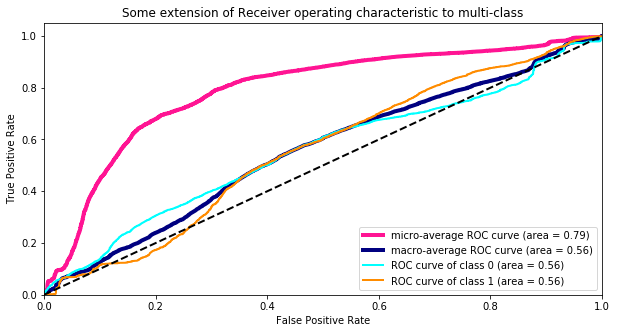

In [141]:
y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bi[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_bi[:,:2].ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from scipy import interp
from itertools import cycle
lw = 2
n_classes = 2



# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', 
#          linestyle=':', 
         linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', 
#          linestyle=':', 
         linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [100]:
# get the groupby value

In [102]:
df_holdout_all.groupby('device_id').gender.first().dropna()

device_id
-9192503757087427819    M
-9185115130004278864    M
-9182270938122267037    M
-9173470456704182813    M
-9153933338384923161    M
                       ..
 9126517277056392130    F
 9142871054769997718    M
 9163193903744363451    M
 9197007241577758004    M
 9215085115859659343    M
Name: gender, Length: 1000, dtype: object

In [103]:
df_holdout_all.groupby('device_id')[['event_cnt_by_device', 'pred_F', 'pred_M']].mean().dropna()

,event_cnt_by_device,pred_F,pred_M
device_id,,,
-9192503757087427819,74.0,0.059913,0.940087
-9185115130004278864,56.0,0.337552,0.662448
-9182270938122267037,22.0,0.495123,0.504877
-9173470456704182813,58.0,0.446918,0.553082
-9153933338384923161,142.0,0.220206,0.779794
...,...,...,...
9126517277056392130,28.0,0.303861,0.696139
9142871054769997718,146.0,0.140971,0.859029
9163193903744363451,88.0,0.223526,0.776474


In [104]:
df_evaluation_original = pd.concat([df_holdout_all.groupby('device_id')[['event_cnt_by_device', 'pred_F', 'pred_M']].mean().dropna().reset_index(),
          df_holdout_all.groupby('device_id').gender.first().dropna().reset_index()[['gender']]], axis=1)
df_evaluation_original.head()

,device_id,event_cnt_by_device,pred_F,pred_M,gender
0,-9192503757087427819,74.0,0.059913,0.940087,M
1,-9185115130004278864,56.0,0.337552,0.662448,M
2,-9182270938122267037,22.0,0.495123,0.504877,M
3,-9173470456704182813,58.0,0.446918,0.553082,M
4,-9153933338384923161,142.0,0.220206,0.779794,M


In [105]:
# evaluation

In [106]:
y_prob = df_evaluation_original[['pred_F', 'pred_M']].values
y_valid = le.transform(df_evaluation_original.gender)
y_valid

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [107]:
from sklearn.preprocessing import label_binarize
y_valid_bi = label_binarize(y_valid, classes=[0, 1, 2])
y_valid_bi

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bi[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_bi[:,:2].ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\kefei\Anaconda3\envs\thinkful\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


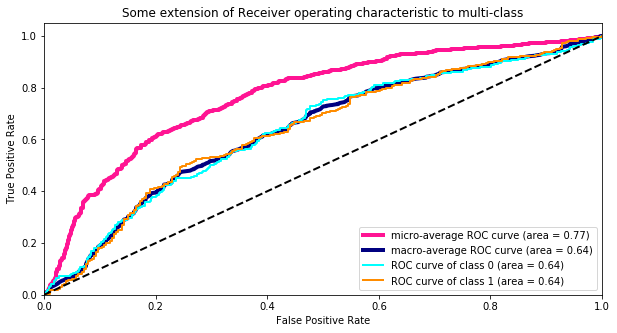

In [108]:
from scipy import interp
from itertools import cycle
lw = 2
n_classes = 2



# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', 
#          linestyle=':', 
         linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', 
#          linestyle=':', 
         linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

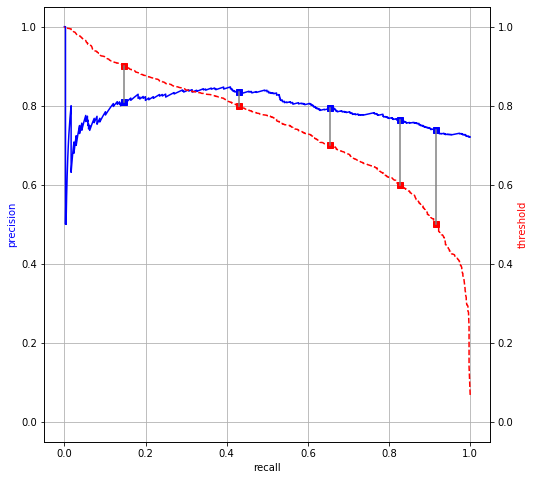

In [109]:
# precision-recall curve with threshold
from sklearn.metrics import precision_recall_curve

fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_valid, 
          probas_pred = y_prob[:,1],)
thres = np.append(thres, 1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.5,1,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, markeredgecolor='r', linestyle='dashed', color='r')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '-', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='blue')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

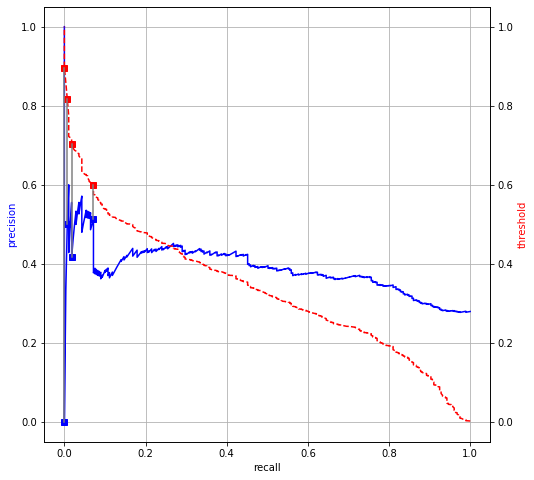

In [110]:
# class-0
# precision-recall curve with threshold
from sklearn.metrics import precision_recall_curve

fig, ax = plt.subplots(figsize=(8,8))
# ax.plot([0, 1], [0, 1], 'k--', lw=2)
# ax.plot(np.arange(0.1,1,0.1), np.arange(0.1,1,0.1), 's', color='k')
precision, recall, thres = precision_recall_curve(y_true = y_valid_bi[:,0], 
          probas_pred = y_prob[:,0],)
thres = np.append(thres, 1)
df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in np.arange(0.6,0.9,0.1):
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list

ax.plot(recall, precision, c='blue')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')
ax.plot(recall, thres, markeredgecolor='r', linestyle='dashed', color='r')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,2], 's', color='r')

ax.plot([np.array(thres_critical_list)[:,1],np.array(thres_critical_list)[:,1]], 
        [np.array(thres_critical_list)[:,0],np.array(thres_critical_list)[:,2]], '-', color='gray')


ax.set_ylim(-0.05,1.05)
plt.xlabel('recall')
plt.ylabel('precision', c='blue')

ax2 = ax.twinx()
ax2.set_ylabel('threshold', c='r')
ax2.set_ylim(-0.05,1.05)

ax.grid()

In [111]:
# confidence

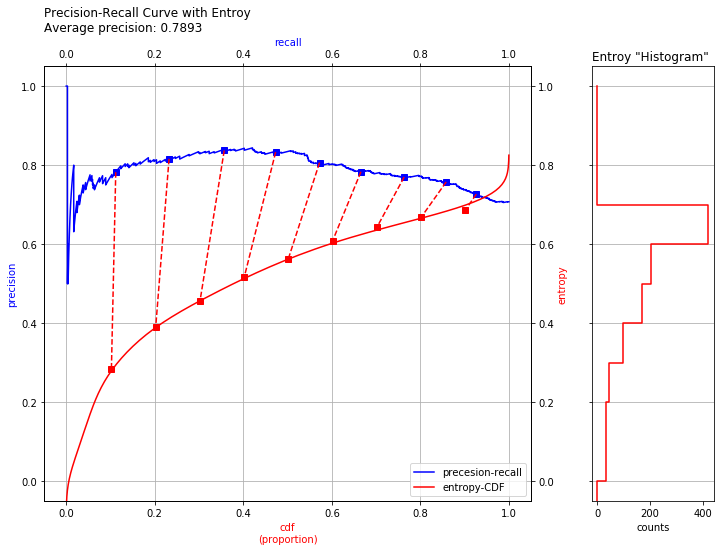

In [112]:
# confidence
# MIMIC precision-recall curve with threshold (NOT SURE TALKING ABOUT PRECISION RECALL MAKE SENSE)
from sklearn.metrics import precision_recall_curve
from statsmodels.distributions.empirical_distribution import ECDF # manually calcuate CDF


y_pred = pd.DataFrame(y_prob).apply(lambda x: x.idxmax(), axis=1).values
y_pred

df_compare = pd.DataFrame({'y_pred': y_pred, 'y_valid':y_valid})
df_compare

y_compare = df_compare.apply(lambda x: 1 if x.y_pred==x.y_valid else 0, axis=1).values

1- entropy(y_prob, axis=1)

entropy_array = entropy(y_prob, axis=1)
critical_points = np.quantile(entropy_array, np.arange(0.1,1,0.1))
critical_points

fig, axes = plt.subplots(1,2, figsize=(12,8), sharey=True, gridspec_kw={'width_ratios': [2,0.5]})

# precision-recall curve
precision, recall, thres = precision_recall_curve(y_true = y_compare, 
          probas_pred = 1- entropy(y_prob, axis=1),)
ap = average_precision_score(y_true = y_compare, 
                             y_score = 1- entropy(y_prob, axis=1))
thres = 1- np.append(thres, 1)

df_tmp = pd.DataFrame({'precision':precision, 'recall':recall,'thres': thres})
# df_tmp
thres_critical_list = []
for x in critical_points:
    thres_critical_list.append(df_tmp.iloc[(df_tmp['thres']-x).abs().argmin()].values)
thres_critical_list
# thres_critical_list
ax=axes[0]
ax.plot(recall, precision, c='blue', label='precesion-recall')
ax.plot(np.array(thres_critical_list)[:,1], np.array(thres_critical_list)[:,0], 's', color='b')

# entropy-cdf curve
ecdf = ECDF(thres)
df_tmp_2 = pd.DataFrame({'sample':ecdf.x, 'ecdf':ecdf.y,})
# df_tmp
thres_critical_list_2 = []
for x in critical_points:
    thres_critical_list_2.append(df_tmp_2.iloc[(df_tmp_2['sample']-x).abs().argmin()].values)
thres_critical_list_2 = np.array(thres_critical_list_2)

sns.kdeplot(data=entropy(y_prob, axis=1), vertical=True, cumulative=True, color='r', label='entropy-CDF', ax=ax)
ax.plot(np.array(thres_critical_list_2)[:,1], np.array(thres_critical_list_2)[:,0], 's', color='r')


# connection lines 
ax.plot([np.array(thres_critical_list)[:,1],thres_critical_list_2[:,1]], 
        [np.array(thres_critical_list)[:,0],thres_critical_list_2[:,0]], '--', color='r')

ax.set_ylim(-0.05,1.05)
# ax.set_ylim(0,1)
ax.set_xlabel('cdf\n(proportion)', c='r')
ax.set_ylabel('precision', c='b')
ax.set_title('Precision-Recall Curve with Entroy\nAverage precision: {:.4f}'.format(ap), loc='left')
ax.legend(loc='lower right')

ax2 = ax.twinx()
ax2.set_ylabel('entropy', c='r')
ax2.set_ylim(-0.05,1.05)
ax3 = ax.twiny()
ax3.set_xlabel('recall', c='b')
ax3.set_xlim(-0.05,1.05)

ax.grid()



# axis no.2
ax = axes[1]
thres_count_list =[]
for x in np.arange(-0.1,1.2,0.1):
    thres_count_list.append(df_tmp.sort_index(ascending=False).iloc[(df_tmp['thres']-x).abs().argmin()].name)
thres_count_list
np.diff(thres_count_list)
df_count_tmp = df_tmp.thres.apply(lambda x: (int(x *10)+1)/10).value_counts().sort_index()
# df_count_tmp
value_tmp = np.concatenate(([0],df_count_tmp.values,))
index_tmp = np.concatenate(([df_count_tmp.index[-1]+0.1],df_count_tmp.index,))
# sns.lineplot(df_count_tmp.values, df_count_tmp.index             ,
#              drawstyle='steps-post', 
#              color = 'r',
#              ax=ax)
ax.step(np.diff(thres_count_list), np.arange(-0.1,1.2,0.1)[:-1],
              where='pre', 
             color = 'r',
             )
ax.grid(axis='y')
ax.set_title('Entroy "Histogram"', loc='left')
ax.set_xlabel('counts', )


plt.show()

In [113]:
type(results.models[0])

skopt.learning.forest.ExtraTreesRegressor

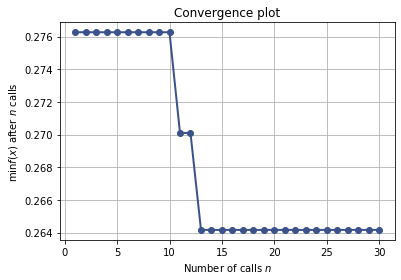

In [114]:
skopt.plots.plot_convergence(results)

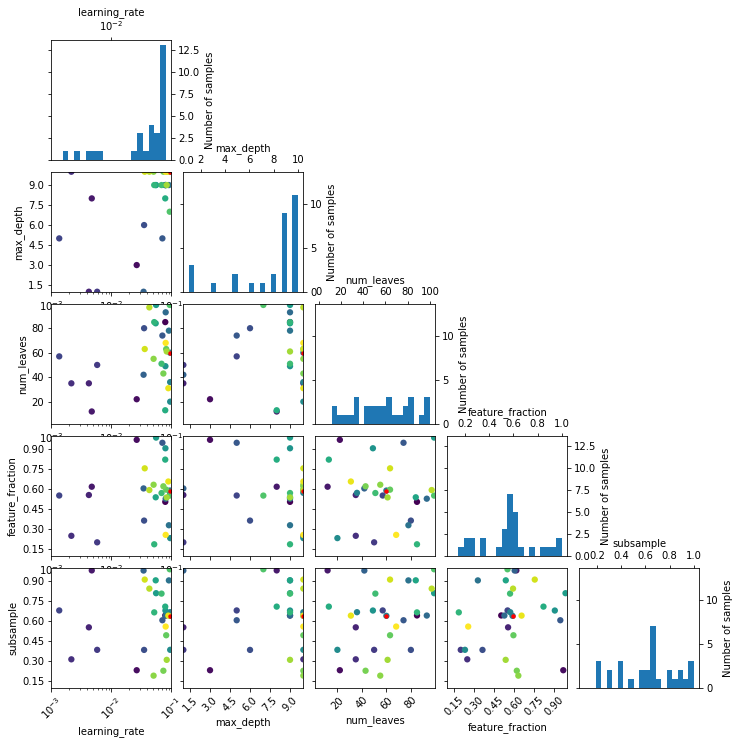

In [115]:
g = skopt.plots.plot_evaluations(results)

In [116]:
1/(1+np.exp(-8))

0.9996646498695336

In [117]:
1/(1+np.exp(-(1-8)))

0.0009110511944006454

In [118]:
1/(1+np.exp(-(1-8)))+1/(1+np.exp(-8))

1.0005757010639342

In [119]:
1/(1+np.exp(-5))

0.9933071490757153

In [120]:
1/(1+np.exp(-5))

0.9933071490757153

In [121]:
np.exp(0)+np.exp(5)

149.4131591025766

In [122]:
np.exp(5)/(np.exp(0)+np.exp(5))

0.9933071490757152

In [123]:
from scipy.special import softmax
np.set_printoptions(precision=5)

x = np.array([[1, 0.5, 0.2, 3],
              [1,  -1,   7, 3],
              [2,  12,  13, 3]])

In [124]:
m = softmax(x,)
m


array([[4.48309e-06, 2.71913e-06, 2.01438e-06, 3.31258e-05],
       [4.48309e-06, 6.06720e-07, 1.80861e-03, 3.31258e-05],
       [1.21863e-05, 2.68421e-01, 7.29644e-01, 3.31258e-05]])

In [125]:
m = softmax(x, axis=0)


m


array([[2.11942e-01, 1.01300e-05, 2.75394e-06, 3.33333e-01],
       [2.11942e-01, 2.26030e-06, 2.47262e-03, 3.33333e-01],
       [5.76117e-01, 9.99988e-01, 9.97525e-01, 3.33333e-01]])

In [126]:
np.set_printoptions(precision=5)
softmax([8,5,0])

array([9.52270e-01, 4.74107e-02, 3.19451e-04])

In [127]:
np.set_printoptions(precision=5)
softmax([8,5,-100])

array([9.52574e-01, 4.74259e-02, 1.18876e-47])

In [128]:
softmax([0,5])

array([0.00669, 0.99331])

In [129]:
softmax([-5,0])

array([0.00669, 0.99331])

In [130]:
softmax([1,6])

array([0.00669, 0.99331])

In [131]:
# expit is the same as sigmoid
from scipy.special import expit

expit(5)

0.9933071490757153

In [132]:
expit(-5)

0.0066928509242848554

In [133]:
softmax([8,5,0])

array([9.52270e-01, 4.74107e-02, 3.19451e-04])

In [134]:
softmax([8+1,5+1,0+1])

array([9.52270e-01, 4.74107e-02, 3.19451e-04])

In [135]:
softmax([8,5,1])

array([9.51747e-01, 4.73847e-02, 8.67881e-04])

In [136]:
softmax([8,6])

array([0.8808, 0.1192])

In [137]:
expit(2)

0.8807970779778823

In [138]:
softmax([8,2,3,1])

array([9.89973e-01, 2.45390e-03, 6.67039e-03, 9.02739e-04])

In [139]:
softmax([8,6,-1,1])

array([8.79995e-01, 1.19094e-01, 1.08600e-04, 8.02451e-04])